In [43]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import statsmodels.api as sm
from scipy.stats import zscore
import scipy.stats as stats
import scipy.cluster.hierarchy as shc
import copy
import os

Problem Statement:

Clustering:

Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

Part 1 - Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [44]:
df = pd.read_excel("Clustering+Clean+Ads_Data.xlsx")

In [45]:
df.head(5)

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [46]:
df.tail(5)

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue  CTR  CPM  CPC  
23061            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23062            2       1   0.04  0.35   0.0260  NaN  NaN  NaN  
23063            1       1   0.05  0.35   0.0325  NaN  NaN  NaN  
23064            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23065            2       1   0.09  0.35   0.0585  NaN  NaN  NaN

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [48]:
df.describe()

Ad - Length     Ad- Width        Ad Size  Available_Impressions  \
count  23066.000000  23066.000000   23066.000000           2.306600e+04   
mean     385.163097    337.896037   96674.468048           2.432044e+06   
std      233.651434    203.092885   61538.329557           4.742888e+06   
min      120.000000     70.000000   33600.000000           1.000000e+00   
25%      120.000000    250.000000   72000.000000           3.367225e+04   
50%      300.000000    300.000000   72000.000000           4.837710e+05   
75%      720.000000    600.000000   84000.000000           2.527712e+06   
max      728.000000    600.000000  216000.000000           2.759286e+07   

       Matched_Queries   Impressions         Clicks         Spend  \
count     2.306600e+04  2.306600e+04   23066.000000  23066.000000   
mean      1.295099e+06  1.241520e+06   10678.518816   2706.625689   
std       2.512970e+06  2.429400e+06   17353.409363   4067.927273   
min       1.000000e+00  1.000000e+00       1.000000      0.000000   
25%       1.828250e+04  7.990500e+03     710.000000     85.180000   
50%       2.580875e+05  2.252900e+05    4425.000000   1425.125000   
75%       1.180700e+06  1.112428e+06   12793.750000   3121.400000   
max       1.470202e+07  1.419477e+07  143049.000000  26931.870000   

                Fee       Revenue           CTR           CPM           CPC  
count  23066.000000  23066.000000  18330.000000  18330.000000  18330.000000  
mean       0.335123   1924.252331      0.073661      7.672045      0.351061  
std        0.031963   3105.238410      0.075160      6.481391      0.343334  
min        0.210000      0.000000      0.000100      0.000000      0.000000  
25%        0.330000     55.365375      0.002600      1.710000      0.090000  
50%        0.350000    926.335000      0.082550      7.660000      0.160000  
75%        0.350000   2091.338150      0.130000     12.510000      0.570000  
max        0.350000  21276.180000      1.000000     81.560000      7.260000

In [49]:
df.shape

(23066, 19)

In [50]:
df.duplicated().sum()

0

In [51]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [52]:
CPM1 = (df['Spend'] / df['Impressions']) * 1000

In [53]:
CPM1

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
23061    70.0
23062    20.0
23063    50.0
23064    70.0
23065    45.0
Length: 23066, dtype: float64

In [54]:
df['CPM'] = CPM1

In [55]:
CPM1.value_counts()

0.000000      97
20.000000     38
10.000000     37
30.000000     16
5.000000      16
              ..
8.851257       1
12.412499      1
12.525438      1
11.184833      1
715.000000     1
Length: 22473, dtype: int64

In [56]:
CPC1 = (df['Spend'] / df['Clicks'])

In [57]:
df['CPC'] = CPC1

In [58]:
CTR1 = (df['Clicks'] / df['Impressions']) * 100

In [59]:
df['CTR'] = CTR1

Part 1 - Clustering: Treat missing values in CPC, CTR and CPM using the formula given.

In [60]:
#df['CTR'].fillna(df.groupby('Ad - Length')['CTR'].transform("mean"), inplace=True)

In [61]:
#df['CPM'].fillna(df.groupby('Ad - Length')['CPM'].transform("mean"), inplace=True)

In [62]:
#df['CPC'].fillna(df.groupby('Ad - Length')['CPC'].transform("mean"), inplace=True)

In [63]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [64]:
df_pca = df.drop(['Timestamp', 'InventoryType', 'Platform', 'Device Type' , 'Format', 'Ad Type'], axis = 1)

In [65]:
df_pca.head(5)

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250    75000                   1806              325   
1          300        250    75000                   1780              285   
2          300        250    75000                   2727              356   
3          300        250    75000                   2430              497   
4          300        250    75000                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.309598  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.350877  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.281690  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.202020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.413223  0.0  0.0

In [66]:
len(df_pca.columns)

13

Part 1 - Clustering: Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

<AxesSubplot:>

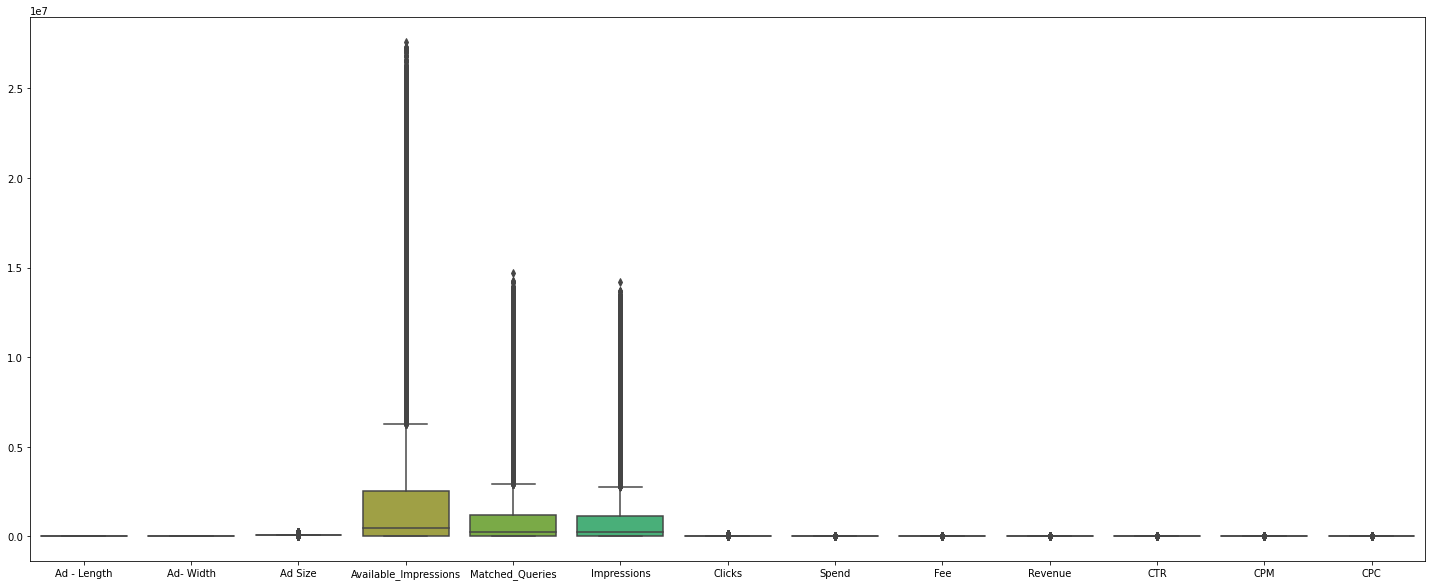

In [67]:
plt.figure(figsize= (25,10))
sns.boxplot(data=df_pca)

In [68]:
def outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur 

In [69]:
lr1,ur1=outlier(df_pca['Ad Size'])
df_pca['Ad Size']=np.where(df_pca['Ad Size']>ur1,ur1,df_pca['Ad Size'])
df_pca['Ad Size']=np.where(df_pca['Ad Size']<lr1,lr1,df_pca['Ad Size'])

In [70]:
lr1,ur1=outlier(df_pca['Available_Impressions'])
df_pca['Available_Impressions']=np.where(df_pca['Available_Impressions']>ur1,ur1,df_pca['Available_Impressions'])
df_pca['Available_Impressions']=np.where(df_pca['Available_Impressions']<lr1,lr1,df_pca['Available_Impressions'])

In [71]:
lr1,ur1=outlier(df_pca['Matched_Queries'])
df_pca['Matched_Queries']=np.where(df_pca['Matched_Queries']>ur1,ur1,df_pca['Matched_Queries'])
df_pca['Matched_Queries']=np.where(df_pca['Matched_Queries']<lr1,lr1,df_pca['Matched_Queries'])

In [72]:
lr1,ur1=outlier(df_pca['Impressions'])
df_pca['Impressions']=np.where(df_pca['Impressions']>ur1,ur1,df_pca['Impressions'])
df_pca['Impressions']=np.where(df_pca['Impressions']<lr1,lr1,df_pca['Impressions'])

In [73]:
lr1,ur1=outlier(df_pca['Clicks'])
df_pca['Clicks']=np.where(df_pca['Clicks']>ur1,ur1,df_pca['Clicks'])
df_pca['Clicks']=np.where(df_pca['Clicks']<lr1,lr1,df_pca['Clicks'])

In [74]:
lr1,ur1=outlier(df_pca['Spend'])
df_pca['Spend']=np.where(df_pca['Spend']>ur1,ur1,df_pca['Spend'])
df_pca['Spend']=np.where(df_pca['Spend']<lr1,lr1,df_pca['Spend'])

In [75]:
lr1,ur1=outlier(df_pca['Fee'])
df_pca['Fee']=np.where(df_pca['Fee']>ur1,ur1,df_pca['Fee'])
df_pca['Fee']=np.where(df_pca['Fee']<lr1,lr1,df_pca['Fee'])

In [76]:
lr1,ur1=outlier(df_pca['Revenue'])
df_pca['Revenue']=np.where(df_pca['Revenue']>ur1,ur1,df_pca['Revenue'])
df_pca['Revenue']=np.where(df_pca['Revenue']<lr1,lr1,df_pca['Revenue'])

In [77]:
lr1,ur1=outlier(df_pca['CTR'])
df_pca['CTR']=np.where(df_pca['CTR']>ur1,ur1,df_pca['CTR'])
df_pca['CTR']=np.where(df_pca['CTR']<lr1,lr1,df_pca['CTR'])

In [78]:
lr1,ur1=outlier(df_pca['CPM'])
df_pca['CPM']=np.where(df_pca['CPM']>ur1,ur1,df_pca['CPM'])
df_pca['CPM']=np.where(df_pca['CPM']<lr1,lr1,df_pca['CPM'])

In [79]:
lr1,ur1=outlier(df_pca['CPC'])
df_pca['CPC']=np.where(df_pca['CPC']>ur1,ur1,df_pca['CPC'])
df_pca['CPC']=np.where(df_pca['CPC']<lr1,lr1,df_pca['CPC'])

<AxesSubplot:>

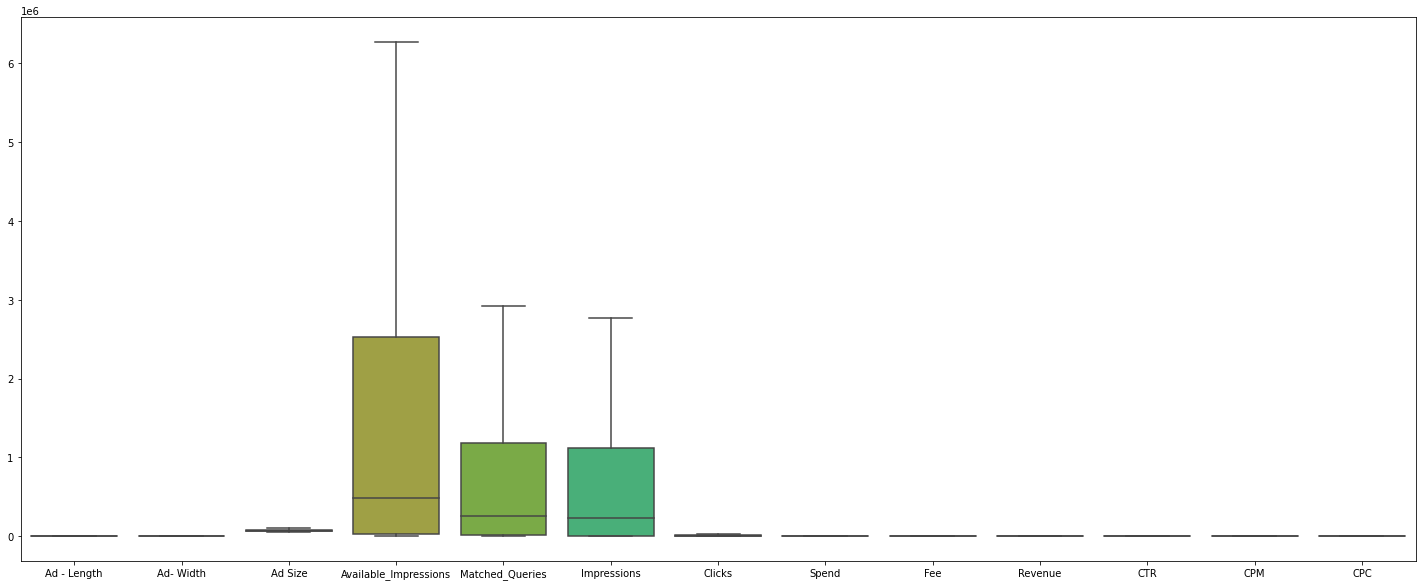

In [80]:
plt.figure(figsize= (25,10))
sns.boxplot(data=df_pca)

Ans : Yes. Outliers are present. Outliers have an significant impact on clustering. So it is better to identify and remove outliers before we apply K-means clustering algorithm. I have used boxplot method IQR value to remove outliers.  

In [81]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23066 non-null  int64  
 1   Ad- Width              23066 non-null  int64  
 2   Ad Size                23066 non-null  float64
 3   Available_Impressions  23066 non-null  float64
 4   Matched_Queries        23066 non-null  float64
 5   Impressions            23066 non-null  float64
 6   Clicks                 23066 non-null  float64
 7   Spend                  23066 non-null  float64
 8   Fee                    23066 non-null  float64
 9   Revenue                23066 non-null  float64
 10  CTR                    23066 non-null  float64
 11  CPM                    23066 non-null  float64
 12  CPC                    23066 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 2.3 MB


In [82]:
df_pca.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250  75000.0                 1806.0            325.0   
1          300        250  75000.0                 1780.0            285.0   
2          300        250  75000.0                 2727.0            356.0   
3          300        250  75000.0                 2430.0            497.0   
4          300        250  75000.0                 1218.0            242.0   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  
0        323.0     1.0    0.0  0.35      0.0  0.309598  0.0  0.0  
1        285.0     1.0    0.0  0.35      0.0  0.350877  0.0  0.0  
2        355.0     1.0    0.0  0.35      0.0  0.281690  0.0  0.0  
3        495.0     1.0    0.0  0.35      0.0  0.202020  0.0  0.0  
4        242.0     1.0    0.0  0.35      0.0  0.413223  0.0  0.0

Part 1 - Clustering: Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [83]:
df_scaled = df_pca.apply(zscore)
df_scaled.head()

Ad - Length  Ad- Width   Ad Size  Available_Impressions  Matched_Queries  \
0    -0.364496  -0.432797 -0.102518              -0.755333        -0.778949   
1    -0.364496  -0.432797 -0.102518              -0.755345        -0.778988   
2    -0.364496  -0.432797 -0.102518              -0.754900        -0.778919   
3    -0.364496  -0.432797 -0.102518              -0.755040        -0.778781   
4    -0.364496  -0.432797 -0.102518              -0.755610        -0.779030   

   Impressions    Clicks    Spend       Fee   Revenue       CTR       CPM  \
0    -0.768478 -0.867488 -0.89317  0.535724 -0.880093 -0.958836 -1.194498   
1    -0.768516 -0.867488 -0.89317  0.535724 -0.880093 -0.953835 -1.194498   
2    -0.768445 -0.867488 -0.89317  0.535724 -0.880093 -0.962218 -1.194498   
3    -0.768302 -0.867488 -0.89317  0.535724 -0.880093 -0.971871 -1.194498   
4    -0.768560 -0.867488 -0.89317  0.535724 -0.880093 -0.946281 -1.194498   

        CPC  
0 -1.042561  
1 -1.042561  
2 -1.042561  
3 -1.042561  
4 -1.042561

Ans : Z-score speeds up its execution. 

Part 1 - Clustering: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

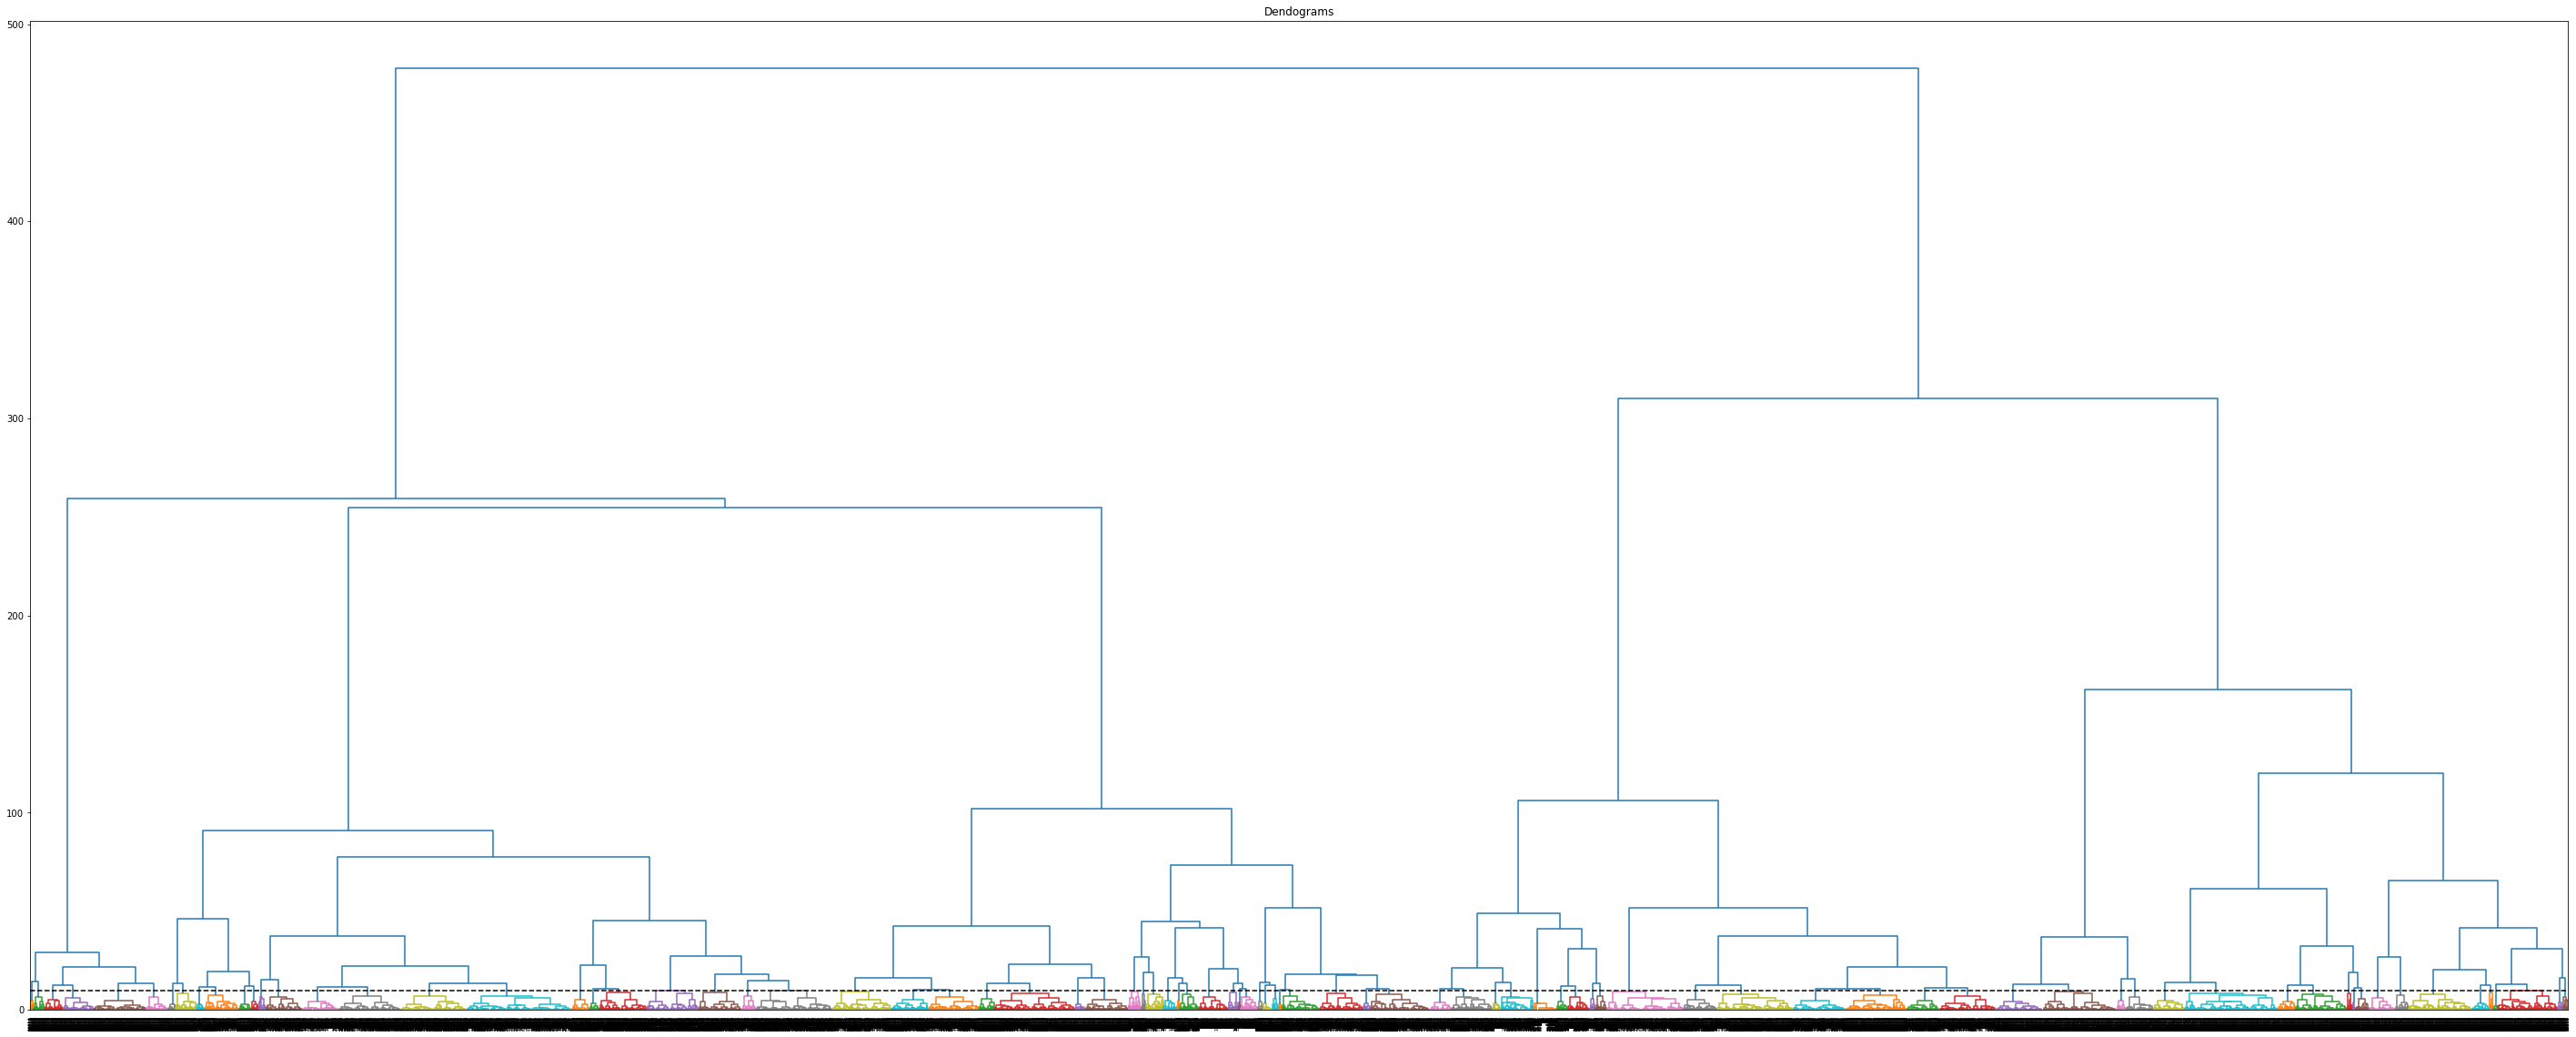

In [84]:
plt.figure(figsize=(50, 20))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'),color_threshold=10)
plt.axhline(10, color='black', linestyle='--')
plt.show()

In [85]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [86]:
wardlink = linkage(df_pca,method='ward')

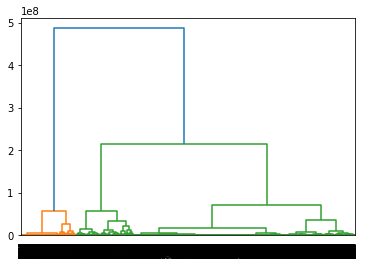

In [87]:
dend = dendrogram(wardlink)

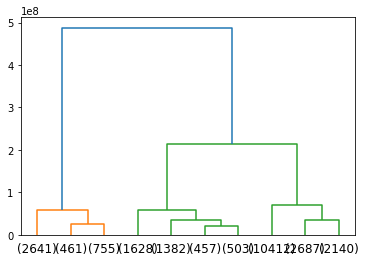

In [88]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

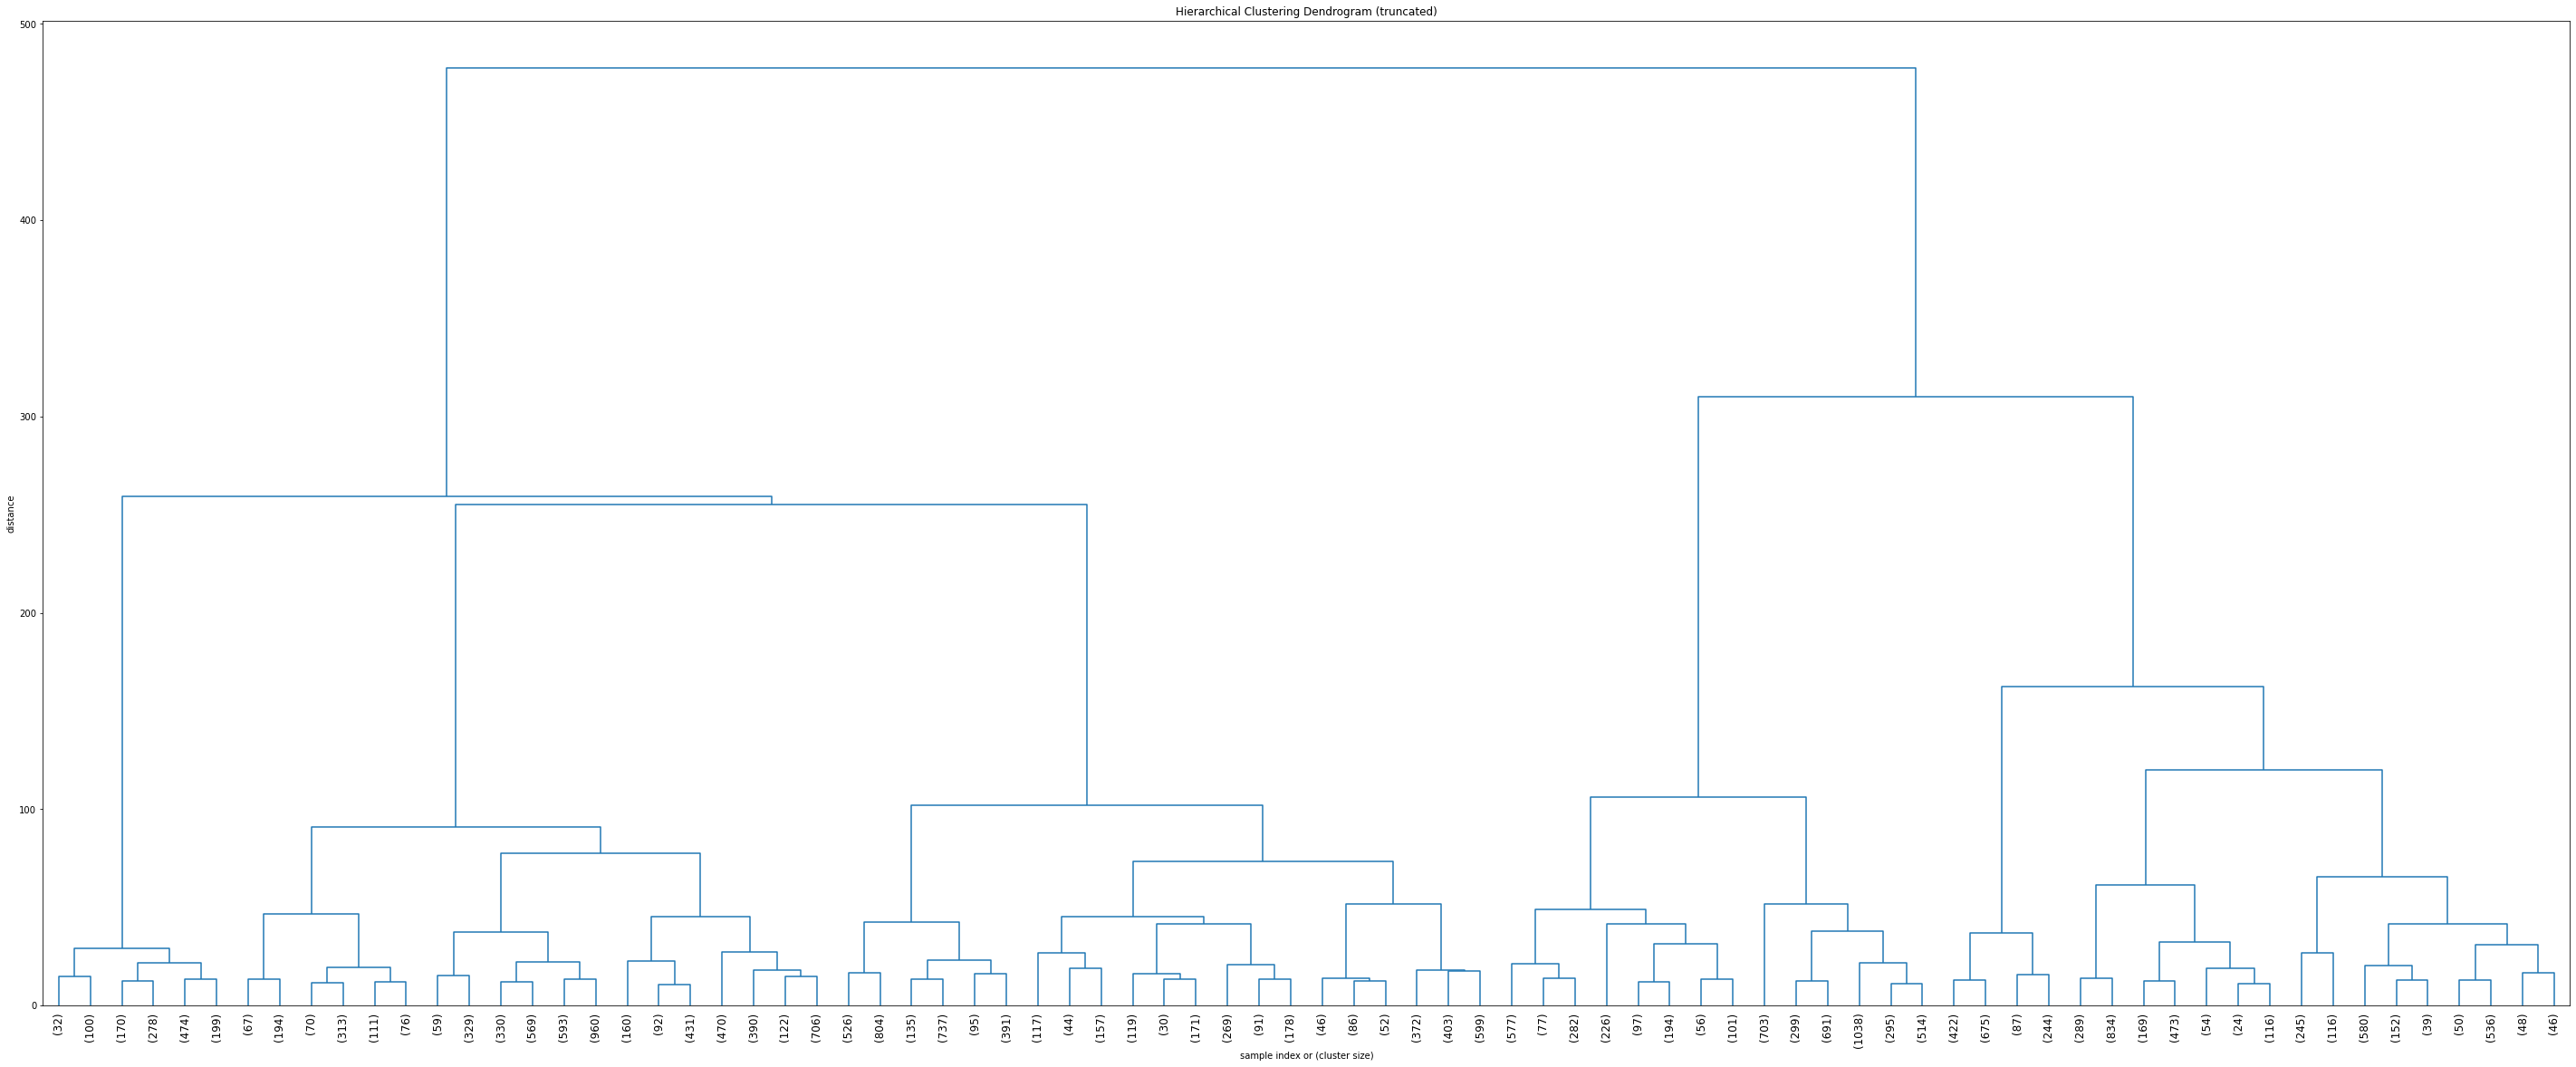

In [89]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(50, 20))
Z_Final = linkage(df_scaled, 'ward', metric='euclidean')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=80,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=12,
    color_threshold=10 
)
plt.show()

Part 1 - Clustering: Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

In [90]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df_scaled)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

In [91]:
for i in range(1,11):
    print('The WSS value for',i,'clusters is',wcss[i-1])

The WSS value for 1 clusters is 299858.0000000002
The WSS value for 2 clusters is 183349.1020288608
The WSS value for 3 clusters is 130878.34240367355
The WSS value for 4 clusters is 95133.94481349865
The WSS value for 5 clusters is 61539.18919785385
The WSS value for 6 clusters is 51676.896816004584
The WSS value for 7 clusters is 44598.258497467934
The WSS value for 8 clusters is 39597.848136521905
The WSS value for 9 clusters is 36061.74016782992
The WSS value for 10 clusters is 33544.281618482746


C:\Users\murb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


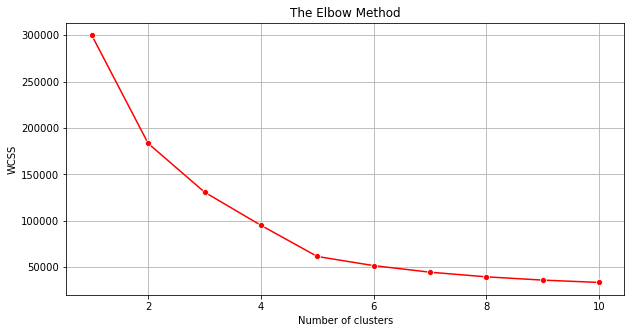

In [92]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

Ans : 4 is the optimum number of clusters for k-means algorithm.

Part 1 - Clustering: Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [120]:
k_means1 = KMeans(n_clusters = 1)
k_means1.fit(df_scaled)
labels = k_means1.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [121]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [122]:
k_means1 = KMeans(n_clusters = 2)
k_means1.fit(df_scaled)
labels1 = k_means1.labels_
labels1

array([1, 1, 1, ..., 1, 1, 1])

In [116]:
silhouette_score(df_scaled,labels1)

0.5165635029478517

In [118]:
k_means1 = KMeans(n_clusters = 3)
k_means1.fit(df_scaled)
labels1 = k_means1.labels_
labels1

array([2, 2, 2, ..., 0, 0, 0])

In [119]:
silhouette_score(df_scaled,labels1)

0.3825486036570082

In [123]:
k_means1 = KMeans(n_clusters = 4)
k_means1.fit(df_scaled)
labels1 = k_means1.labels_
labels1

array([3, 3, 3, ..., 1, 1, 1])

In [124]:
silhouette_score(df_scaled,labels1)

0.44534519247649795

In [125]:
k_means1 = KMeans(n_clusters = 5)
k_means1.fit(df_scaled)
labels1 = k_means1.labels_
labels1

array([2, 2, 2, ..., 3, 1, 3])

In [126]:
silhouette_score(df_scaled,labels1)

0.5240956940501831

In [127]:
k_means1 = KMeans(n_clusters = 6)
k_means1.fit(df_scaled)
labels1 = k_means1.labels_
labels1

array([4, 4, 4, ..., 2, 0, 2])

In [128]:
silhouette_score(df_scaled,labels1)

0.5221533662938636

In [129]:
k_means1 = KMeans(n_clusters = 7)
k_means1.fit(df_scaled)
labels1 = k_means1.labels_
labels1

array([4, 4, 4, ..., 1, 2, 1])

In [130]:
silhouette_score(df_scaled,labels1)

0.5165635029478517

In [131]:
k_means1 = KMeans(n_clusters = 8)
k_means1.fit(df_scaled)
labels1 = k_means1.labels_
labels1

array([5, 5, 5, ..., 0, 3, 0])

In [132]:
silhouette_score(df_scaled,labels1)

0.4797524035378018

In [133]:
k_means1 = KMeans(n_clusters = 9)
k_means1.fit(df_scaled)
labels1 = k_means1.labels_
labels1

array([2, 2, 2, ..., 0, 5, 0])

In [134]:
silhouette_score(df_scaled,labels1)

0.4319362982867749

In [135]:
k_means1 = KMeans(n_clusters = 10)
k_means1.fit(df_scaled)
labels1 = k_means1.labels_
labels1

array([7, 7, 7, ..., 2, 9, 2])

In [136]:
silhouette_score(df_scaled,labels1)

0.44536263333539217

In [137]:
sil_width = silhouette_samples(df_scaled,labels1)

In [138]:
df_pca['sil_width'] = sil_width
df_pca.head(5)

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250  75000.0                 1806.0            325.0   
1          300        250  75000.0                 1780.0            285.0   
2          300        250  75000.0                 2727.0            356.0   
3          300        250  75000.0                 2430.0            497.0   
4          300        250  75000.0                 1218.0            242.0   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  \
0        323.0     1.0    0.0  0.35      0.0  0.309598  0.0  0.0   
1        285.0     1.0    0.0  0.35      0.0  0.350877  0.0  0.0   
2        355.0     1.0    0.0  0.35      0.0  0.281690  0.0  0.0   
3        495.0     1.0    0.0  0.35      0.0  0.202020  0.0  0.0   
4        242.0     1.0    0.0  0.35      0.0  0.413223  0.0  0.0   

   Clus_kmeans4  sil_width  
0             3   0.193389  
1             3   0.194190  
2             3   0.192791  
3             3   0.191084  
4             3   0.195324

Ans : silhouette score is better for 4 clusters than for 3 clusters. So 4 is the optimum number of clusters.

Part 1 - Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].

In [139]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_scaled)
labels = k_means.labels_
labels

array([0, 0, 0, ..., 1, 1, 1])

In [140]:
df_pca["Clus_kmeans4"] = labels
df_pca.head(10)

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250  75000.0                 1806.0            325.0   
1          300        250  75000.0                 1780.0            285.0   
2          300        250  75000.0                 2727.0            356.0   
3          300        250  75000.0                 2430.0            497.0   
4          300        250  75000.0                 1218.0            242.0   
5          300        250  75000.0                  490.0             64.0   
6          300        250  75000.0                 1197.0            202.0   
7          300        250  75000.0                 1363.0            198.0   
8          300        250  75000.0                 1402.0            137.0   
9          300        250  75000.0                 1816.0            312.0   

   Impressions  Clicks  Spend   Fee  Revenue       CTR       CPM   CPC  \
0        323.0     1.0   0.00  0.35      0.0  0.309598  0.000000  0.00   
1        285.0     1.0   0.00  0.35      0.0  0.350877  0.000000  0.00   
2        355.0     1.0   0.00  0.35      0.0  0.281690  0.000000  0.00   
3        495.0     1.0   0.00  0.35      0.0  0.202020  0.000000  0.00   
4        242.0     1.0   0.00  0.35      0.0  0.413223  0.000000  0.00   
5         64.0     2.0   0.00  0.35      0.0  3.125000  0.000000  0.00   
6        202.0     1.0   0.01  0.35      0.0  0.495050  0.049505  0.01   
7        196.0     1.0   0.00  0.35      0.0  0.510204  0.000000  0.00   
8        136.0     1.0   0.00  0.35      0.0  0.735294  0.000000  0.00   
9        311.0     1.0   0.00  0.35      0.0  0.321543  0.000000  0.00   

   Clus_kmeans4  sil_width  
0             0   0.193389  
1             0   0.194190  
2             0   0.192791  
3             0   0.191084  
4             0   0.195324  
5             0   0.213490  
6             0   0.195420  
7             0   0.196896  
8             0   0.200195  
9             0   0.193625

In [141]:
df_pca.tail(10)

Ad - Length  Ad- Width   Ad Size  Available_Impressions  \
23056          120        600   72000.0                    2.0   
23057          120        600   72000.0                    5.0   
23058          720        300  102000.0                    1.0   
23059          720        300  102000.0                    2.0   
23060          120        600   72000.0                    4.0   
23061          720        300  102000.0                    1.0   
23062          720        300  102000.0                    3.0   
23063          720        300  102000.0                    2.0   
23064          120        600   72000.0                    7.0   
23065          720        300  102000.0                    2.0   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue        CTR  \
23056              2.0          2.0     1.0   0.10  0.35   0.0650  33.278766   
23057              2.0          2.0     1.0   0.07  0.35   0.0455  33.278766   
23058              1.0          1.0     1.0   0.08  0.35   0.0520  33.278766   
23059              2.0          2.0     1.0   0.07  0.35   0.0455  33.278766   
23060              4.0          4.0     1.0   0.14  0.35   0.0910  25.000000   
23061              1.0          1.0     1.0   0.07  0.35   0.0455  33.278766   
23062              2.0          2.0     1.0   0.04  0.35   0.0260  33.278766   
23063              1.0          1.0     1.0   0.05  0.35   0.0325  33.278766   
23064              1.0          1.0     1.0   0.07  0.35   0.0455  33.278766   
23065              2.0          2.0     1.0   0.09  0.35   0.0585  33.278766   

             CPM   CPC  Clus_kmeans4  sil_width  
23056  29.981418  0.10             1   0.334885  
23057  29.981418  0.07             1   0.334769  
23058  29.981418  0.08             1   0.210325  
23059  29.981418  0.07             1   0.210204  
23060  29.981418  0.14             1   0.313133  
23061  29.981418  0.07             1   0.210204  
23062  20.000000  0.04             1   0.298354  
23063  29.981418  0.05             1   0.209679  
23064  29.981418  0.07             1   0.334769  
23065  29.981418  0.09             1   0.210335

In [142]:
clust_profile=df_pca.drop(['Ad - Length', 'Ad- Width', 'Matched_Queries', 'Impressions' , 'Ad Size', 'Available_Impressions'], axis = 1)
clust_profile=clust_profile.groupby('Clus_kmeans4').mean()
clust_profile['freq']=df_pca.Clus_kmeans4.value_counts().sort_index()
clust_profile

Clicks        Spend       Fee      Revenue        CTR  \
Clus_kmeans4                                                                
0              3256.069609  1502.278355  0.349267   978.838843   0.402821   
1              6954.156267   647.116196  0.349828   421.191764  14.607067   
2             30551.916344  6522.059774  0.305764  4454.785247  13.758696   
3             11239.989897  5736.706676  0.313297  3876.959415   0.217316   

                    CPM       CPC  sil_width   freq  
Clus_kmeans4                                         
0              1.786078  0.529599   0.459239   6163  
1             13.131697  0.100728   0.381338  11294  
2             15.397786  0.111971   0.659854   1551  
3              1.573353  0.748490   0.520496   4058

Cluster 0 : We can see trend of frequency is more.
Cluster 1 : We can see trend of clicks , spend , revenue and CPC is more. 
Cluster 2 : We can see trend of CTR , CPM is more.
Cluster 3 : We can see trend of Fee is more. 

In [143]:
df_pca.groupby(['Clus_kmeans4'])['Clicks'].mean()

Clus_kmeans4
0     3256.069609
1     6954.156267
2    30551.916344
3    11239.989897
Name: Clicks, dtype: float64

Text(0.5, 1.0, 'Trends in Clicks')

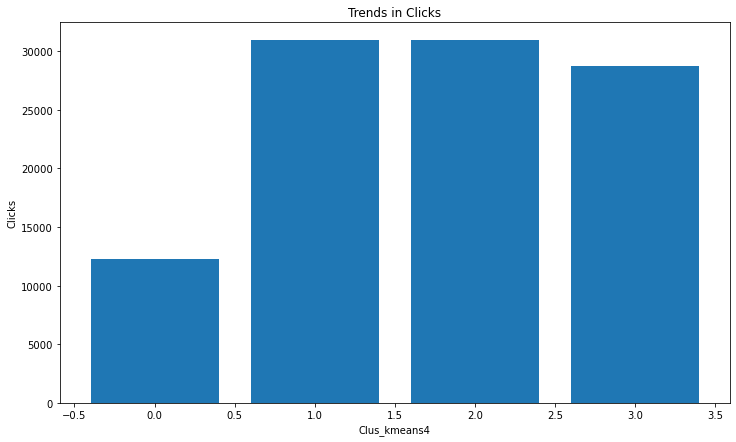

In [144]:
plt.figure(figsize=(12,7))
plt.bar(df_pca['Clus_kmeans4'], df_pca['Clicks'])
plt.xlabel('Clus_kmeans4')
plt.ylabel('Clicks')
plt.title('Trends in Clicks')

In [148]:
df_pca.groupby(['Clus_kmeans4'])['Spend'].mean()

Clus_kmeans4
0    1502.278355
1     647.116196
2    6522.059774
3    5736.706676
Name: Spend, dtype: float64

Text(0.5, 1.0, 'Trends in Spend')

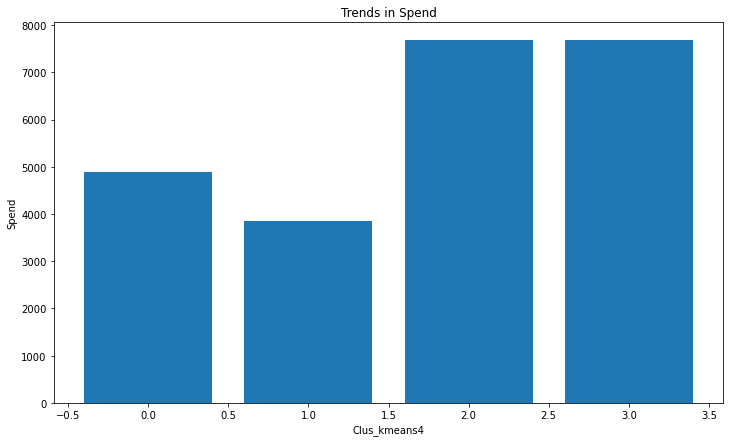

In [149]:
plt.figure(figsize=(12,7))
plt.bar(df_pca['Clus_kmeans4'], df_pca['Spend'])
plt.xlabel('Clus_kmeans4')
plt.ylabel('Spend')
plt.title('Trends in Spend')

In [150]:
df_pca.groupby(['Clus_kmeans4'])['Revenue'].mean()

Clus_kmeans4
0     978.838843
1     421.191764
2    4454.785247
3    3876.959415
Name: Revenue, dtype: float64

Text(0.5, 1.0, 'Trends in Revenue')

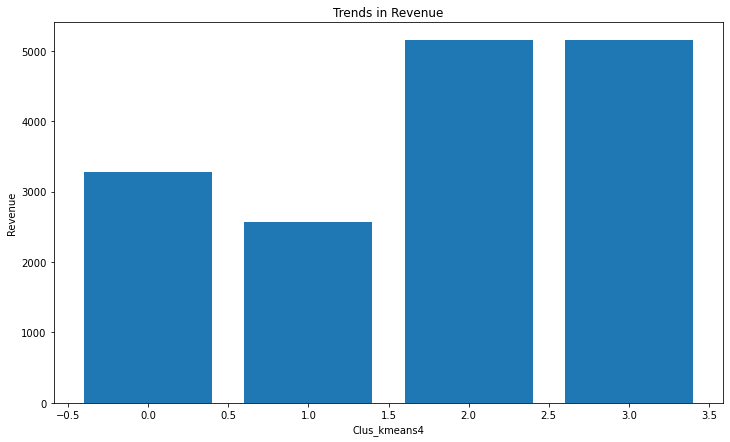

In [151]:
plt.figure(figsize=(12,7))
plt.bar(df_pca['Clus_kmeans4'], df_pca['Revenue'])
plt.xlabel('Clus_kmeans4')
plt.ylabel('Revenue')
plt.title('Trends in Revenue')

In [152]:
df_pca.groupby(['Clus_kmeans4'])['CTR'].mean()

Clus_kmeans4
0     0.402821
1    14.607067
2    13.758696
3     0.217316
Name: CTR, dtype: float64

Text(0.5, 1.0, 'Trends in CTR')

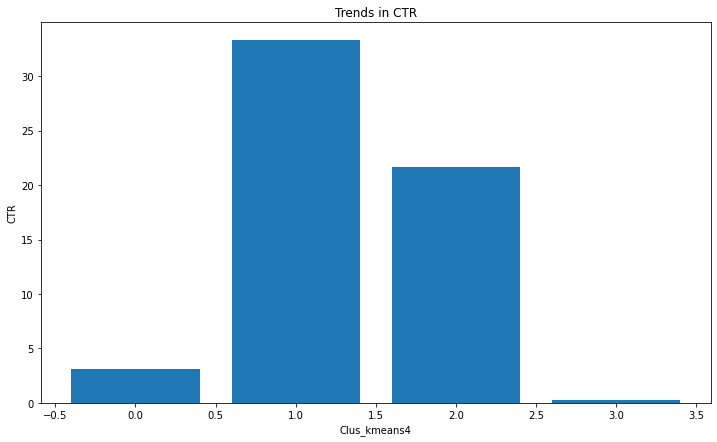

In [153]:
plt.figure(figsize=(12,7))
plt.bar(df_pca['Clus_kmeans4'], df_pca['CTR'])
plt.xlabel('Clus_kmeans4')
plt.ylabel('CTR')
plt.title('Trends in CTR')

In [154]:
df_pca.groupby(['Clus_kmeans4'])['CPM'].mean()

Clus_kmeans4
0     1.786078
1    13.131697
2    15.397786
3     1.573353
Name: CPM, dtype: float64

Text(0.5, 1.0, 'Trends in CPM')

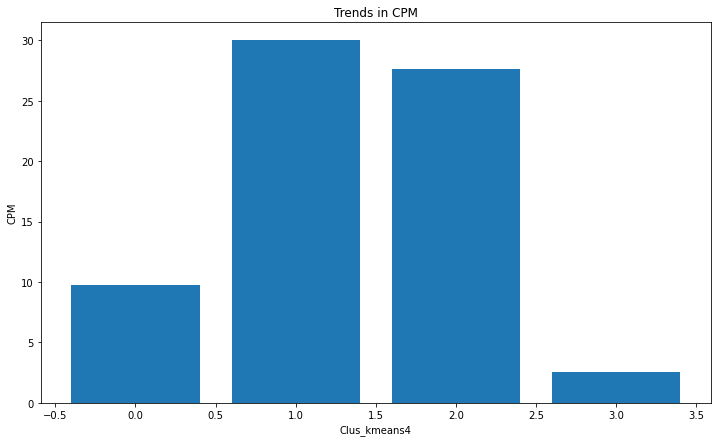

In [155]:
plt.figure(figsize=(12,7))
plt.bar(df_pca['Clus_kmeans4'], df_pca['CPM'])
plt.xlabel('Clus_kmeans4')
plt.ylabel('CPM')
plt.title('Trends in CPM')

In [156]:
df_pca.groupby(['Clus_kmeans4'])['CPC'].mean()

Clus_kmeans4
0    0.529599
1    0.100728
2    0.111971
3    0.748490
Name: CPC, dtype: float64

Text(0.5, 1.0, 'Trends in CPC')

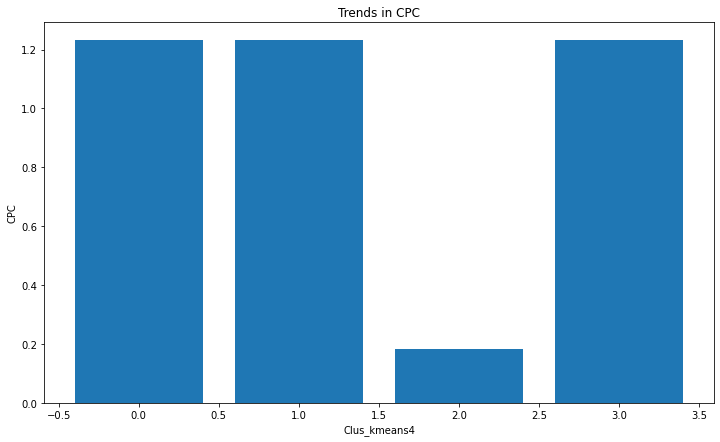

In [157]:
plt.figure(figsize=(12,7))
plt.bar(df_pca['Clus_kmeans4'], df_pca['CPC'])
plt.xlabel('Clus_kmeans4')
plt.ylabel('CPC')
plt.title('Trends in CPC')

Part 1 - Clustering: Conclude the project by providing summary of your learnings.

From the given dataset, we can see there are 23066 observations with 19 columns. As we have already done the necessary basic data analysis by treating the NULL values in CPM , CPC and CTR columns with the help of formula provided. So then outliers were present and we have treated the outliers. Later, we did the visualization part with the help of dendrogram. We also created linkage using Ward and Euclidean function using dendrogram to visualize the output. Then we have done the analysis by using K-Means algorithm with values of k up to 10. And for each K value, we have also calculated silhouette score and decided the K value which is the optimal number of clusters needed. 

Part 2 - PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [158]:
df1 = pd.read_excel("PCA India Data_Census.xlsx")

In [159]:
df1.rename({'Dist.Code' : 'Dist_Code'}, axis=1 , inplace=True)

In [160]:
df1.head()

State Code  Dist_Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [161]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist_Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [162]:
df1.describe

<bound method NDFrame.describe of      State Code  Dist_Code                     State                Area Name  \
0             1          1           Jammu & Kashmir                  Kupwara   
1             1          2           Jammu & Kashmir                   Badgam   
2             1          3           Jammu & Kashmir              Leh(Ladakh)   
3             1          4           Jammu & Kashmir                   Kargil   
4             1          5           Jammu & Kashmir                    Punch   
..          ...        ...                       ...                      ...   
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andam

In [163]:
df1.isnull().sum()

State Code       0
Dist_Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [164]:
df1.duplicated().sum()

0

Part 2 - PCA: Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

(i) Which state has highest gender ratio and which has the lowest?

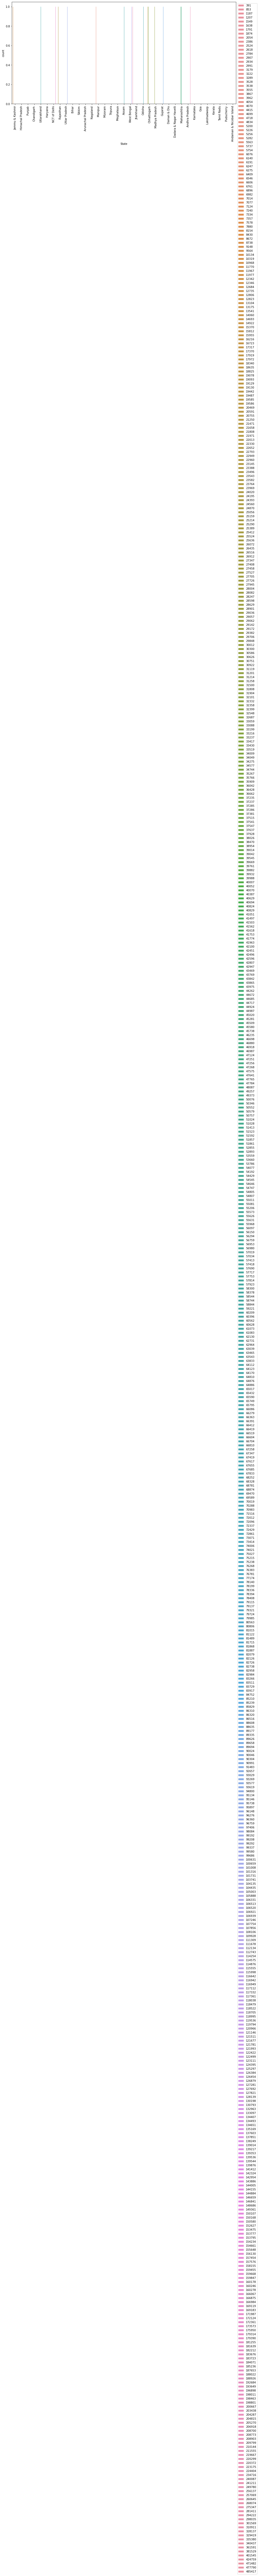

In [165]:
plt.figure(figsize=(15,7))
sns.countplot(x='State', hue='TOT_M', data=df1)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor = [1,1]);

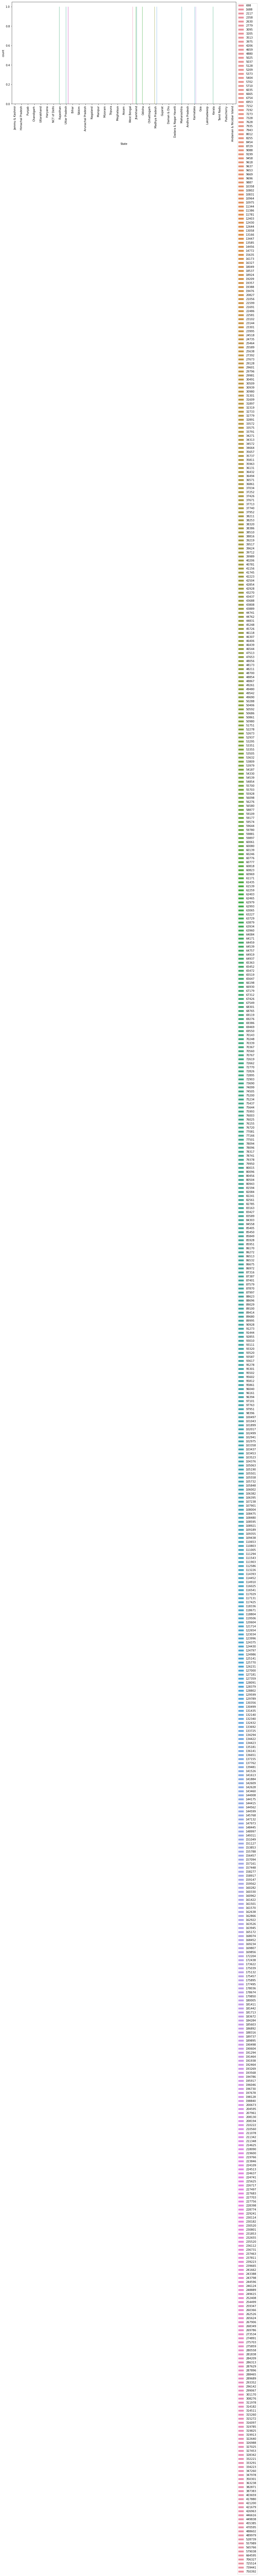

In [166]:
plt.figure(figsize=(15,7))
sns.countplot(x='State', hue='TOT_F', data=df1)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor = [1,1]);

In [167]:
df1.groupby(['State'])[['TOT_M' , 'TOT_F']].max()

TOT_M   TOT_F
State                                   
Andaman & Nicobar Island   11977   18049
Andhra Pradesh            219667  387383
Arunachal Pradesh           7014   13166
Assam                     127692  181713
Bihar                     275347  347260
Chandigarh                 41753   59644
Chhattisgarh              142324  243798
Dadara & Nagar Havelli      6982   10831
Daman & Diu                 7077    9618
Goa                        66086  103523
Gujarat                   298035  421200
Haryana                    83266  106382
Himachal Pradesh          132963  210560
Jammu & Kashmir            93269  128379
Jharkhand                 117112  175457
Karnataka                 401545  664595
Kerala                    477790  739441
Lakshadweep                12823   14772
Madhya Pradesh            138249  196730
Maharashtra               485417  750392
Manipur                    33199   53632
Meghalaya                 106513  144415
Mizoram                    26516   43808
NCT of Delhi              181255  227683
Nagaland                   14922   25638
Odisha                    188926  308276
Puducherry                 47268   80943
Punjab                    187653  248889
Rajasthan                 209799  280558
Sikkim                     12806   20827
Tamil Nadu                192684  322640
Tripura                    80806  128091
Uttar Pradesh             340437  488602
Uttarakhand                92657  132140
West Bengal               471482  725514

In [168]:
df1.TOT_M.max()

485417

In [169]:
df1.TOT_F.max()

750392

Maharashtra state has highest gender ratio

In [170]:
df1.groupby(['State'])[['TOT_M' , 'TOT_F']].min()

TOT_M   TOT_F
State                                  
Andaman & Nicobar Island   1549    2630
Andhra Pradesh            89694  178674
Arunachal Pradesh           391     698
Assam                      9148   13447
Bihar                     19487   27673
Chandigarh                41753   59644
Chhattisgarh               6275   10975
Dadara & Nagar Havelli     6982   10831
Daman & Diu                6076    9088
Goa                       52893   87870
Gujarat                    7334   12403
Haryana                   24020   33791
Himachal Pradesh           1207    2358
Jammu & Kashmir            2784    4206
Jharkhand                 18340   29128
Karnataka                 29706   52937
Kerala                    40007   69276
Lakshadweep               12823   14772
Madhya Pradesh            12735   19476
Maharashtra               28082   47653
Manipur                    5282    7943
Meghalaya                  5226    7273
Mizoram                    2386    3975
NCT of Delhi               5754    8255
Nagaland                   1638    3095
Odisha                     8672   16173
Puducherry                 2618    4659
Punjab                    29057   37952
Rajasthan                 14060   19357
Sikkim                     1874    2779
Tamil Nadu                29036   55928
Tripura                   13175   21599
Uttar Pradesh             25636   34572
Uttarakhand               15812   24735
West Bengal               69470  111294

In [171]:
df1.TOT_M.min()

391

In [172]:
df1.TOT_F.min()

698

Arunachal Pradesh state has the lowest gender ratio. 

(ii) Which district has the highest & lowest gender ratio?

In [173]:
df1.groupby(['Dist_Code'])[['TOT_M' , 'TOT_F']].max()

TOT_M  TOT_F
Dist_Code              
1          23388  29796
2          19585  23102
3           6546  10964
4           2784   4206
5          20591  29981
...          ...    ...
636         8154  11781
637        12346  21691
638         1549   2630
639         5200   8012
640        11977  18049

[640 rows x 2 columns]

In [174]:
print (

       df1[df1['TOT_M'] > 485416 ]

)

     State Code  Dist_Code        State        Area Name   No_HH   TOT_M  \
517          27        518  Maharashtra  Mumbai Suburban  304502  485417   

      TOT_F   M_06   F_06   M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
517  750392  56673  55564  41780  ...           2664           3264   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
517             11             12             28             26   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
517            169            517        2456        2709  

[1 rows x 61 columns]


Dist code 518 has highest gender ratio. 

In [175]:
print (

       df1[df1['TOT_M'] < 392 ]

)

     State Code  Dist_Code              State      Area Name  No_HH  TOT_M  \
256          12        257  Arunachal Pradesh  Dibang Valley    350    391   

     TOT_F  M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
256    698    56    56     0  ...              4             32   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
256              1             11              0              1   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
256              0              0           3          20  

[1 rows x 61 columns]


Dist code 257 has lowest gender ratio. 

What is the literacy rate in the given data set?

In [176]:
literacy = (df1['M_LIT'] / df1['F_LIT'])
literacy.sum()/100

5.963844532313852

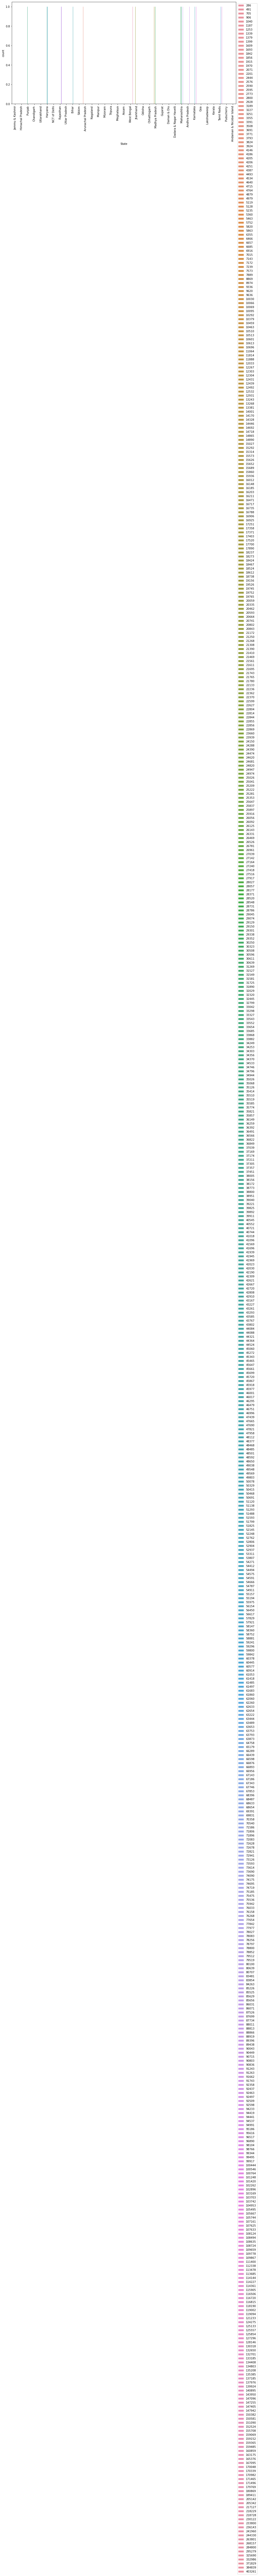

In [177]:
plt.figure(figsize=(15,7))
sns.countplot(x='State', hue='M_LIT', data=df1)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor = [1,1]);

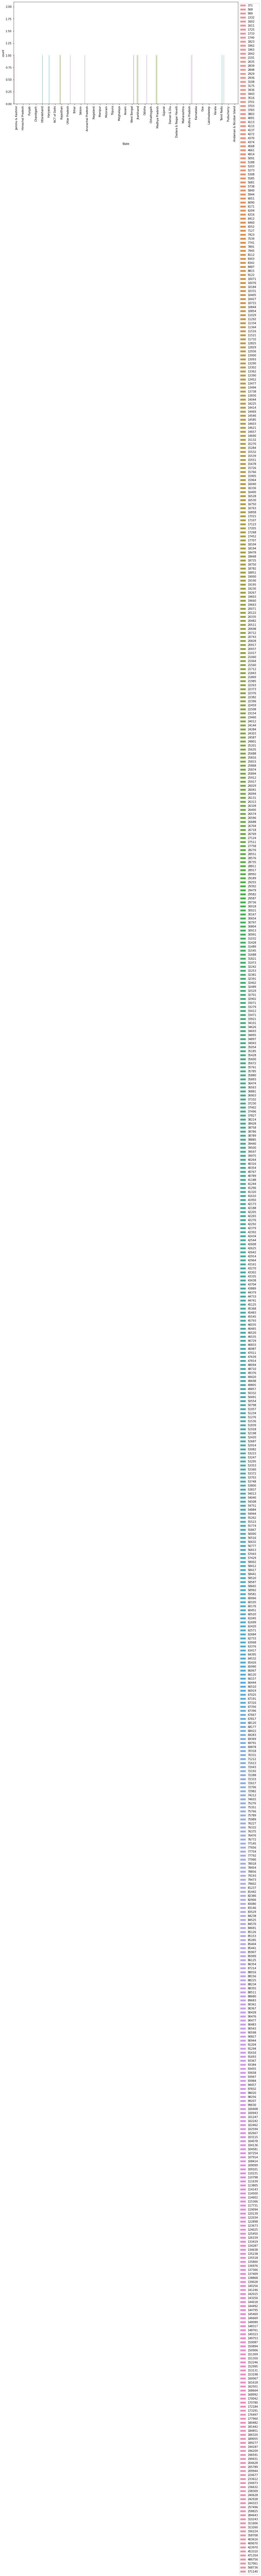

In [178]:
plt.figure(figsize=(15,7))
sns.countplot(x='State', hue='F_LIT', data=df1)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor = [1,1]);

6% is the literacy rate in the given data se

Compare the Total Worker Population of male V/s Female

In [179]:
df1['TOT_WORK_M'].max()

269422

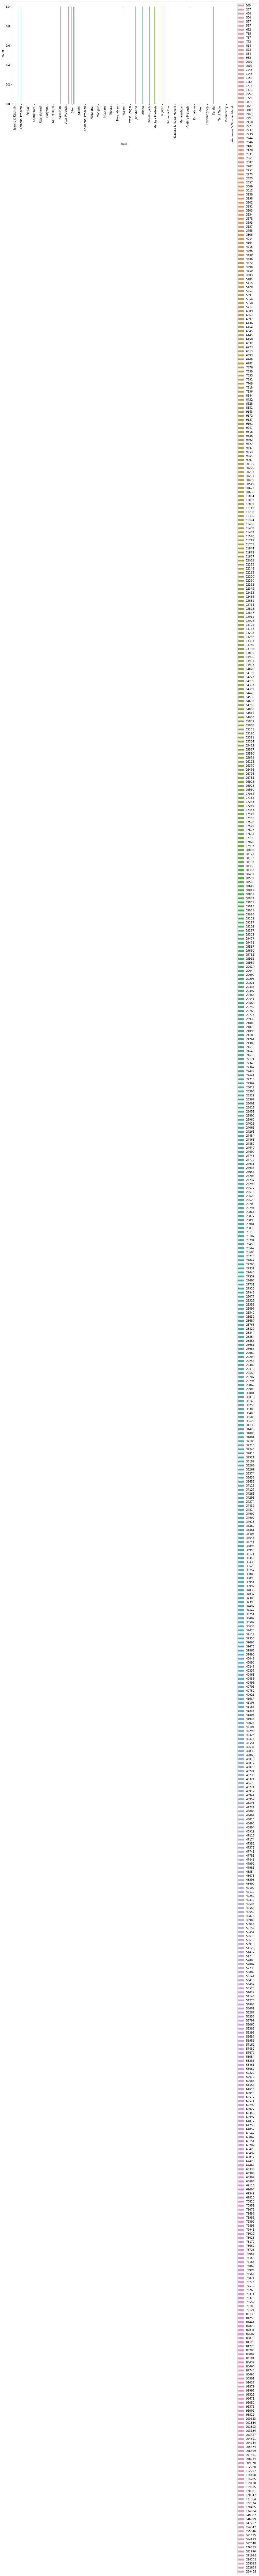

In [180]:
plt.figure(figsize=(15,7))
sns.countplot(x='State', hue='TOT_WORK_M', data=df1)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor = [1,1]);

In [181]:
df1['TOT_WORK_F'].max()

257848

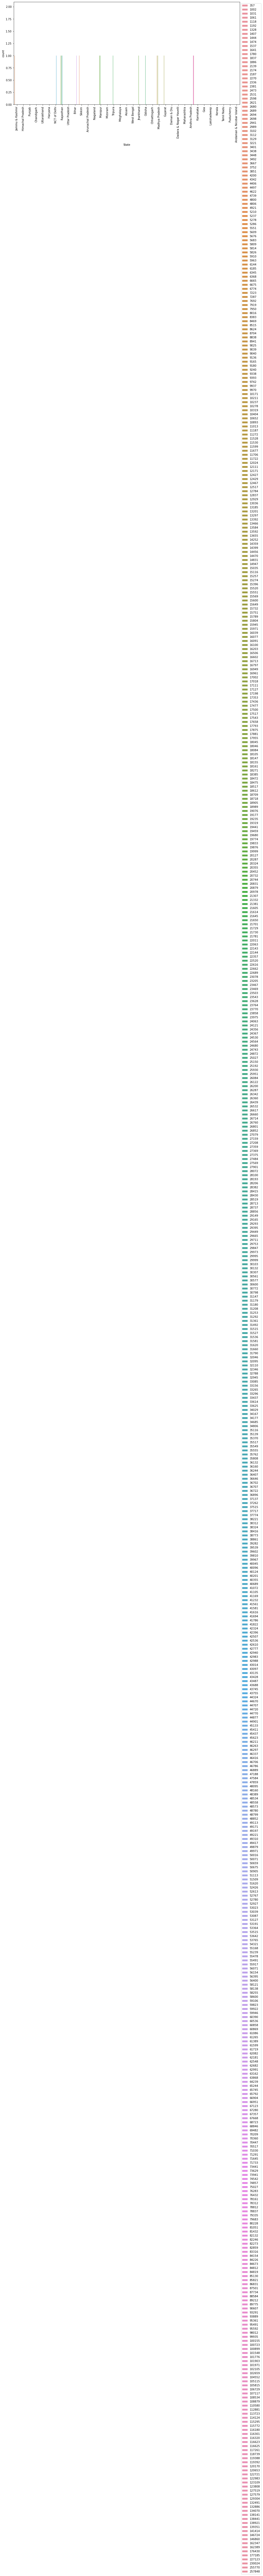

In [182]:
plt.figure(figsize=(15,7))
sns.countplot(x='State', hue='TOT_WORK_F', data=df1)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor = [1,1]);

So total working population of male is more than female. 

Compare the on Working Population Male of male V/s Female

In [183]:
df1['MAINWORK_M'].max()

247911

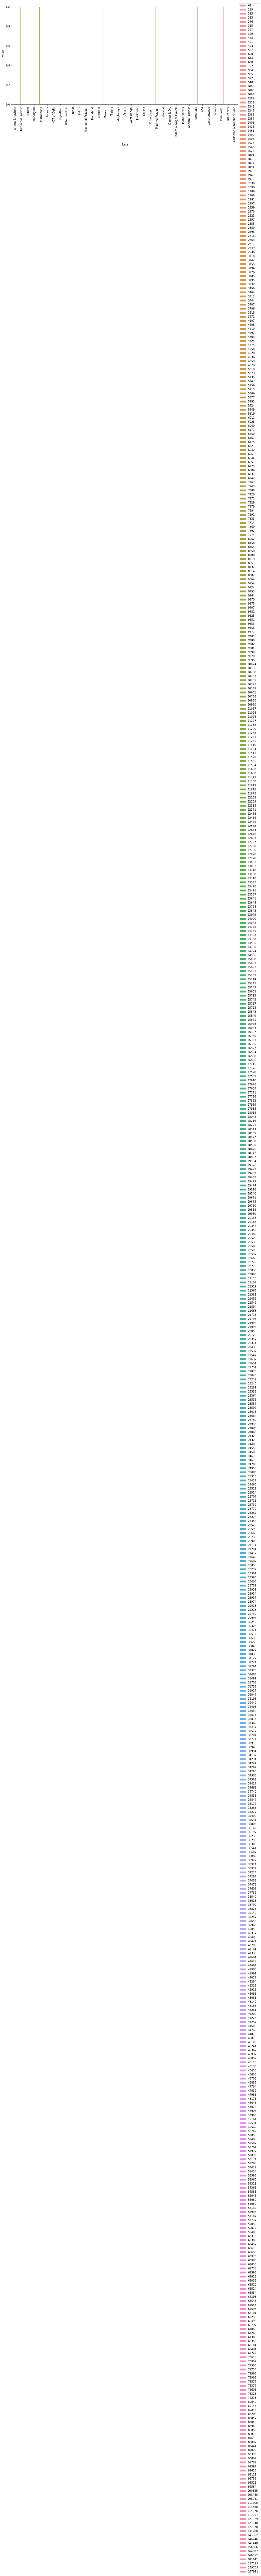

In [184]:
plt.figure(figsize=(15,7))
sns.countplot(x='State', hue='MAINWORK_M', data=df1)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor = [1,1]);

In [185]:
df1['MAINWORK_F'].max()

226166

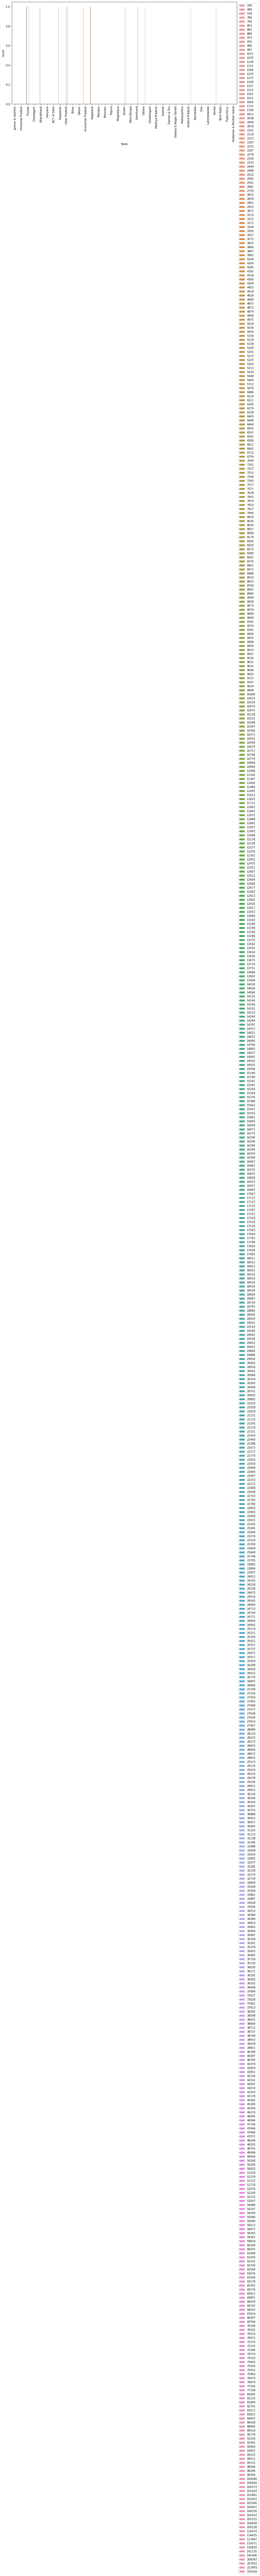

In [186]:
plt.figure(figsize=(15,7))
sns.countplot(x='State', hue='MAINWORK_F', data=df1)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor = [1,1]);

So main working population of male is more when compared to female. 

EDA : Univariate Analysis

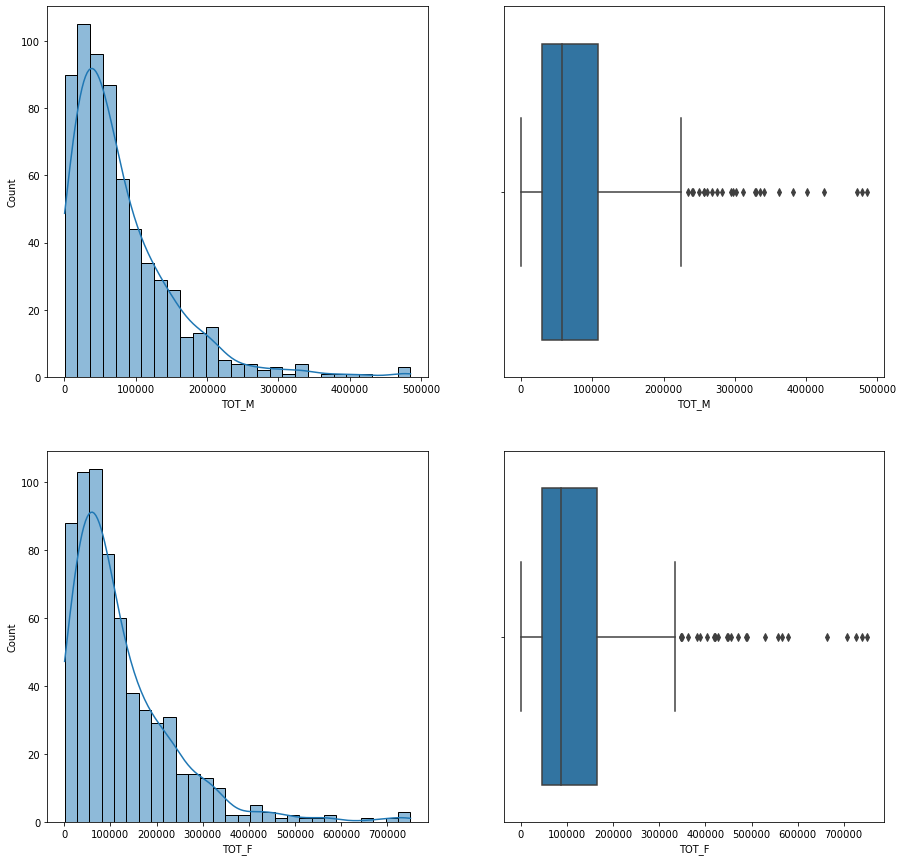

In [187]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,15)
sns.histplot(df2['TOT_M'], kde=True, ax=axes[0][0])
sns.boxplot(x='TOT_M', data=df2, ax=axes[0][1])
sns.histplot(df2['TOT_F'] , kde=True, ax=axes[1][0])
sns.boxplot(x='TOT_F', data=df2, ax=axes[1][1])
plt.show()

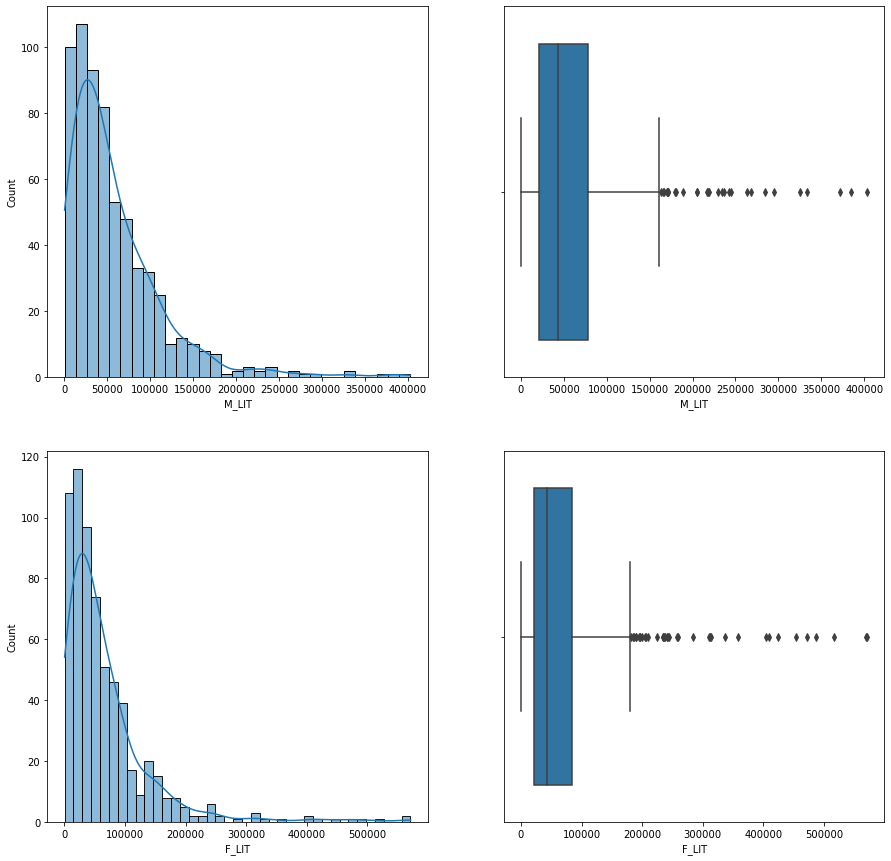

In [188]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,15)
sns.histplot(df2['M_LIT'], kde=True, ax=axes[0][0])
sns.boxplot(x='M_LIT', data=df2, ax=axes[0][1])
sns.histplot(df2['F_LIT'] , kde=True, ax=axes[1][0])
sns.boxplot(x='F_LIT', data=df2, ax=axes[1][1])
plt.show()

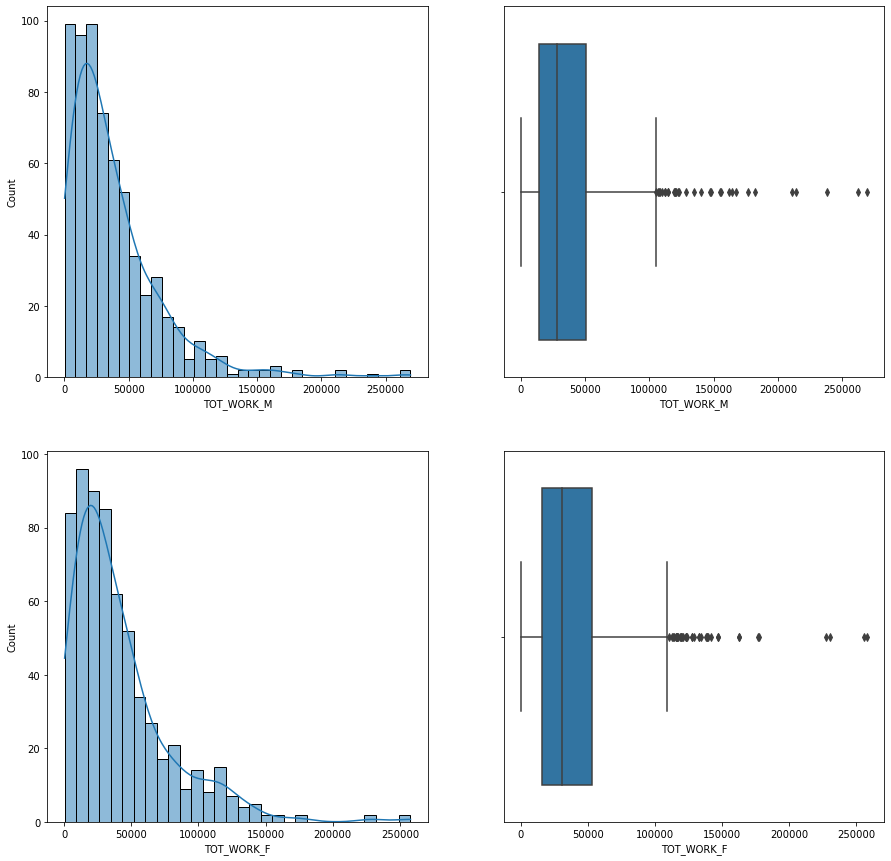

In [189]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,15)
sns.histplot(df2['TOT_WORK_M'], kde=True, ax=axes[0][0])
sns.boxplot(x='TOT_WORK_M', data=df2, ax=axes[0][1])
sns.histplot(df2['TOT_WORK_F'] , kde=True, ax=axes[1][0])
sns.boxplot(x='TOT_WORK_F', data=df2, ax=axes[1][1])
plt.show()

Bivariate Analysis

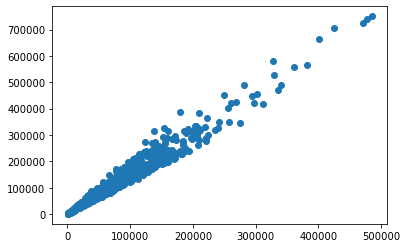

In [190]:
plt.scatter(df2['TOT_M'],df2['TOT_F'])

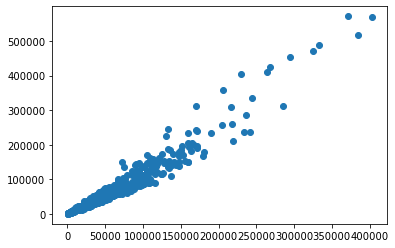

In [191]:
plt.scatter(df2['M_LIT'],df2['F_LIT'])

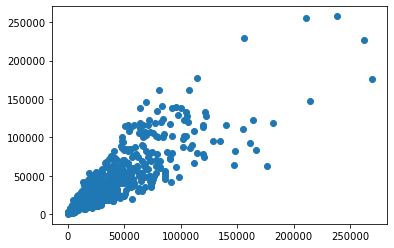

In [192]:
plt.scatter(df2['TOT_WORK_M'],df2['TOT_WORK_F'])

Part 2 - PCA: We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?

Ans : Yes, we need to treat it. It's necessary to treat all the outliers in PCA

In [193]:
df2 = df1.drop(['State', 'Area Name'], axis = 1)

In [194]:
df2.columns

Index(['State Code', 'Dist_Code', 'No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06',
       'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL',
       'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M',
       'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F',
       'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M',
       'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F',
       'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M', 'MARGWORK_3_6_F',
       'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M', 'MARG_AL_3_6_F',
       'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M', 'MARG_OT_3_6_F',
       'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M', 'MARG_CL_0_3_F',
       'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M', 'MARG_HH_0_3_F',
       'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M', 'NON_WORK_F'],
      dtype='object')

In [195]:
df2.shape

(640, 59)

In [196]:
len(df2.columns)

59

In [197]:
df2.head()

State Code  Dist_Code  No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST  \
0           1          1   7707  23388  29796  5862  6196     3     0  1999   
1           1          2   6218  19585  23102  4482  3733     7     6   427   
2           1          3   4452   6546  10964  1082  1018     3     6  5806   
3           1          4   1320   2784   4206   563   677     0     0  2666   
4           1          5  11654  20591  29981  5157  4587    20    33  7670   

   ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
0  ...           1150            749            180            237   
1  ...            525            715            123            229   
2  ...            114            188             44             89   
3  ...            194            247             61            128   
4  ...            874           1928            465           1043   

   MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  \
0            680            252             32             46         258   
1            186            148             76            178         140   
2              3             34              0              4          67   
3             13             50              4             10         116   
4            205            302             24            105         180   

   NON_WORK_F  
0         214  
1         160  
2          61  
3          59  
4         478  

[5 rows x 59 columns]

<AxesSubplot:>

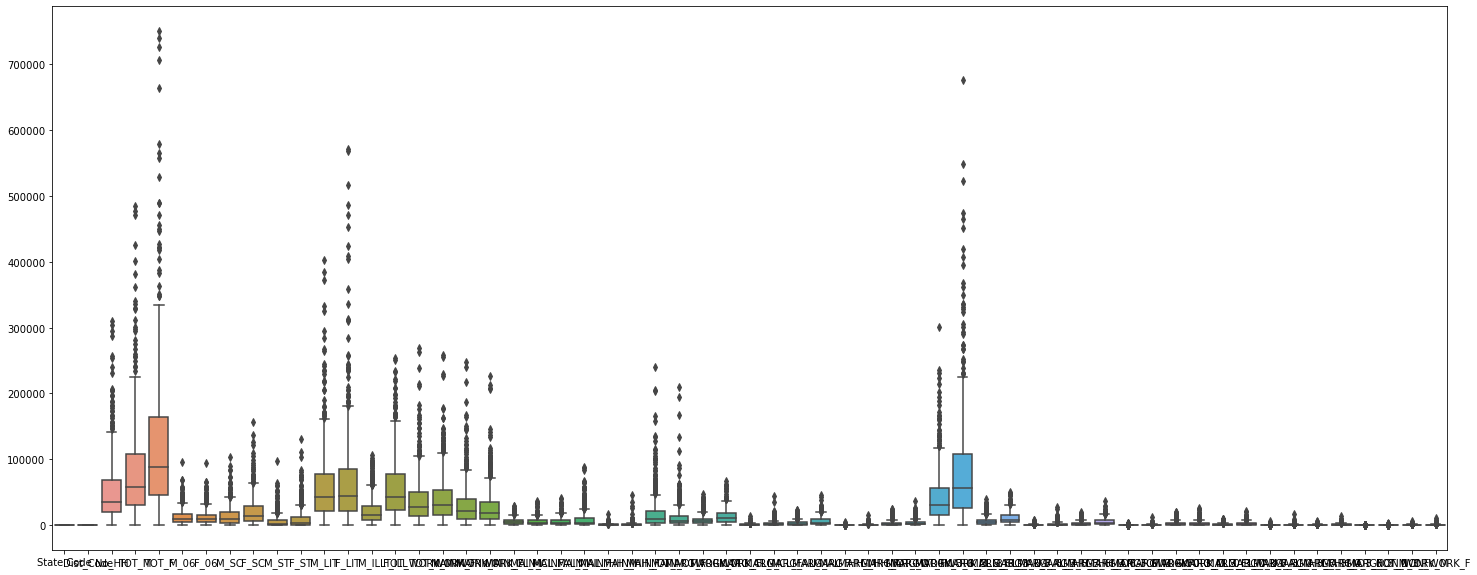

In [198]:
plt.figure(figsize= (25,10))
sns.boxplot(data=df2)

In [204]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [205]:
for i in feature_list:
    LL, UL = remove_outlier(df2[i])
    df2[i] = np.where(df2[i] > UL, UL, df2[i])
    df2[i] = np.where(df2[i] < LL, LL, df2[i])

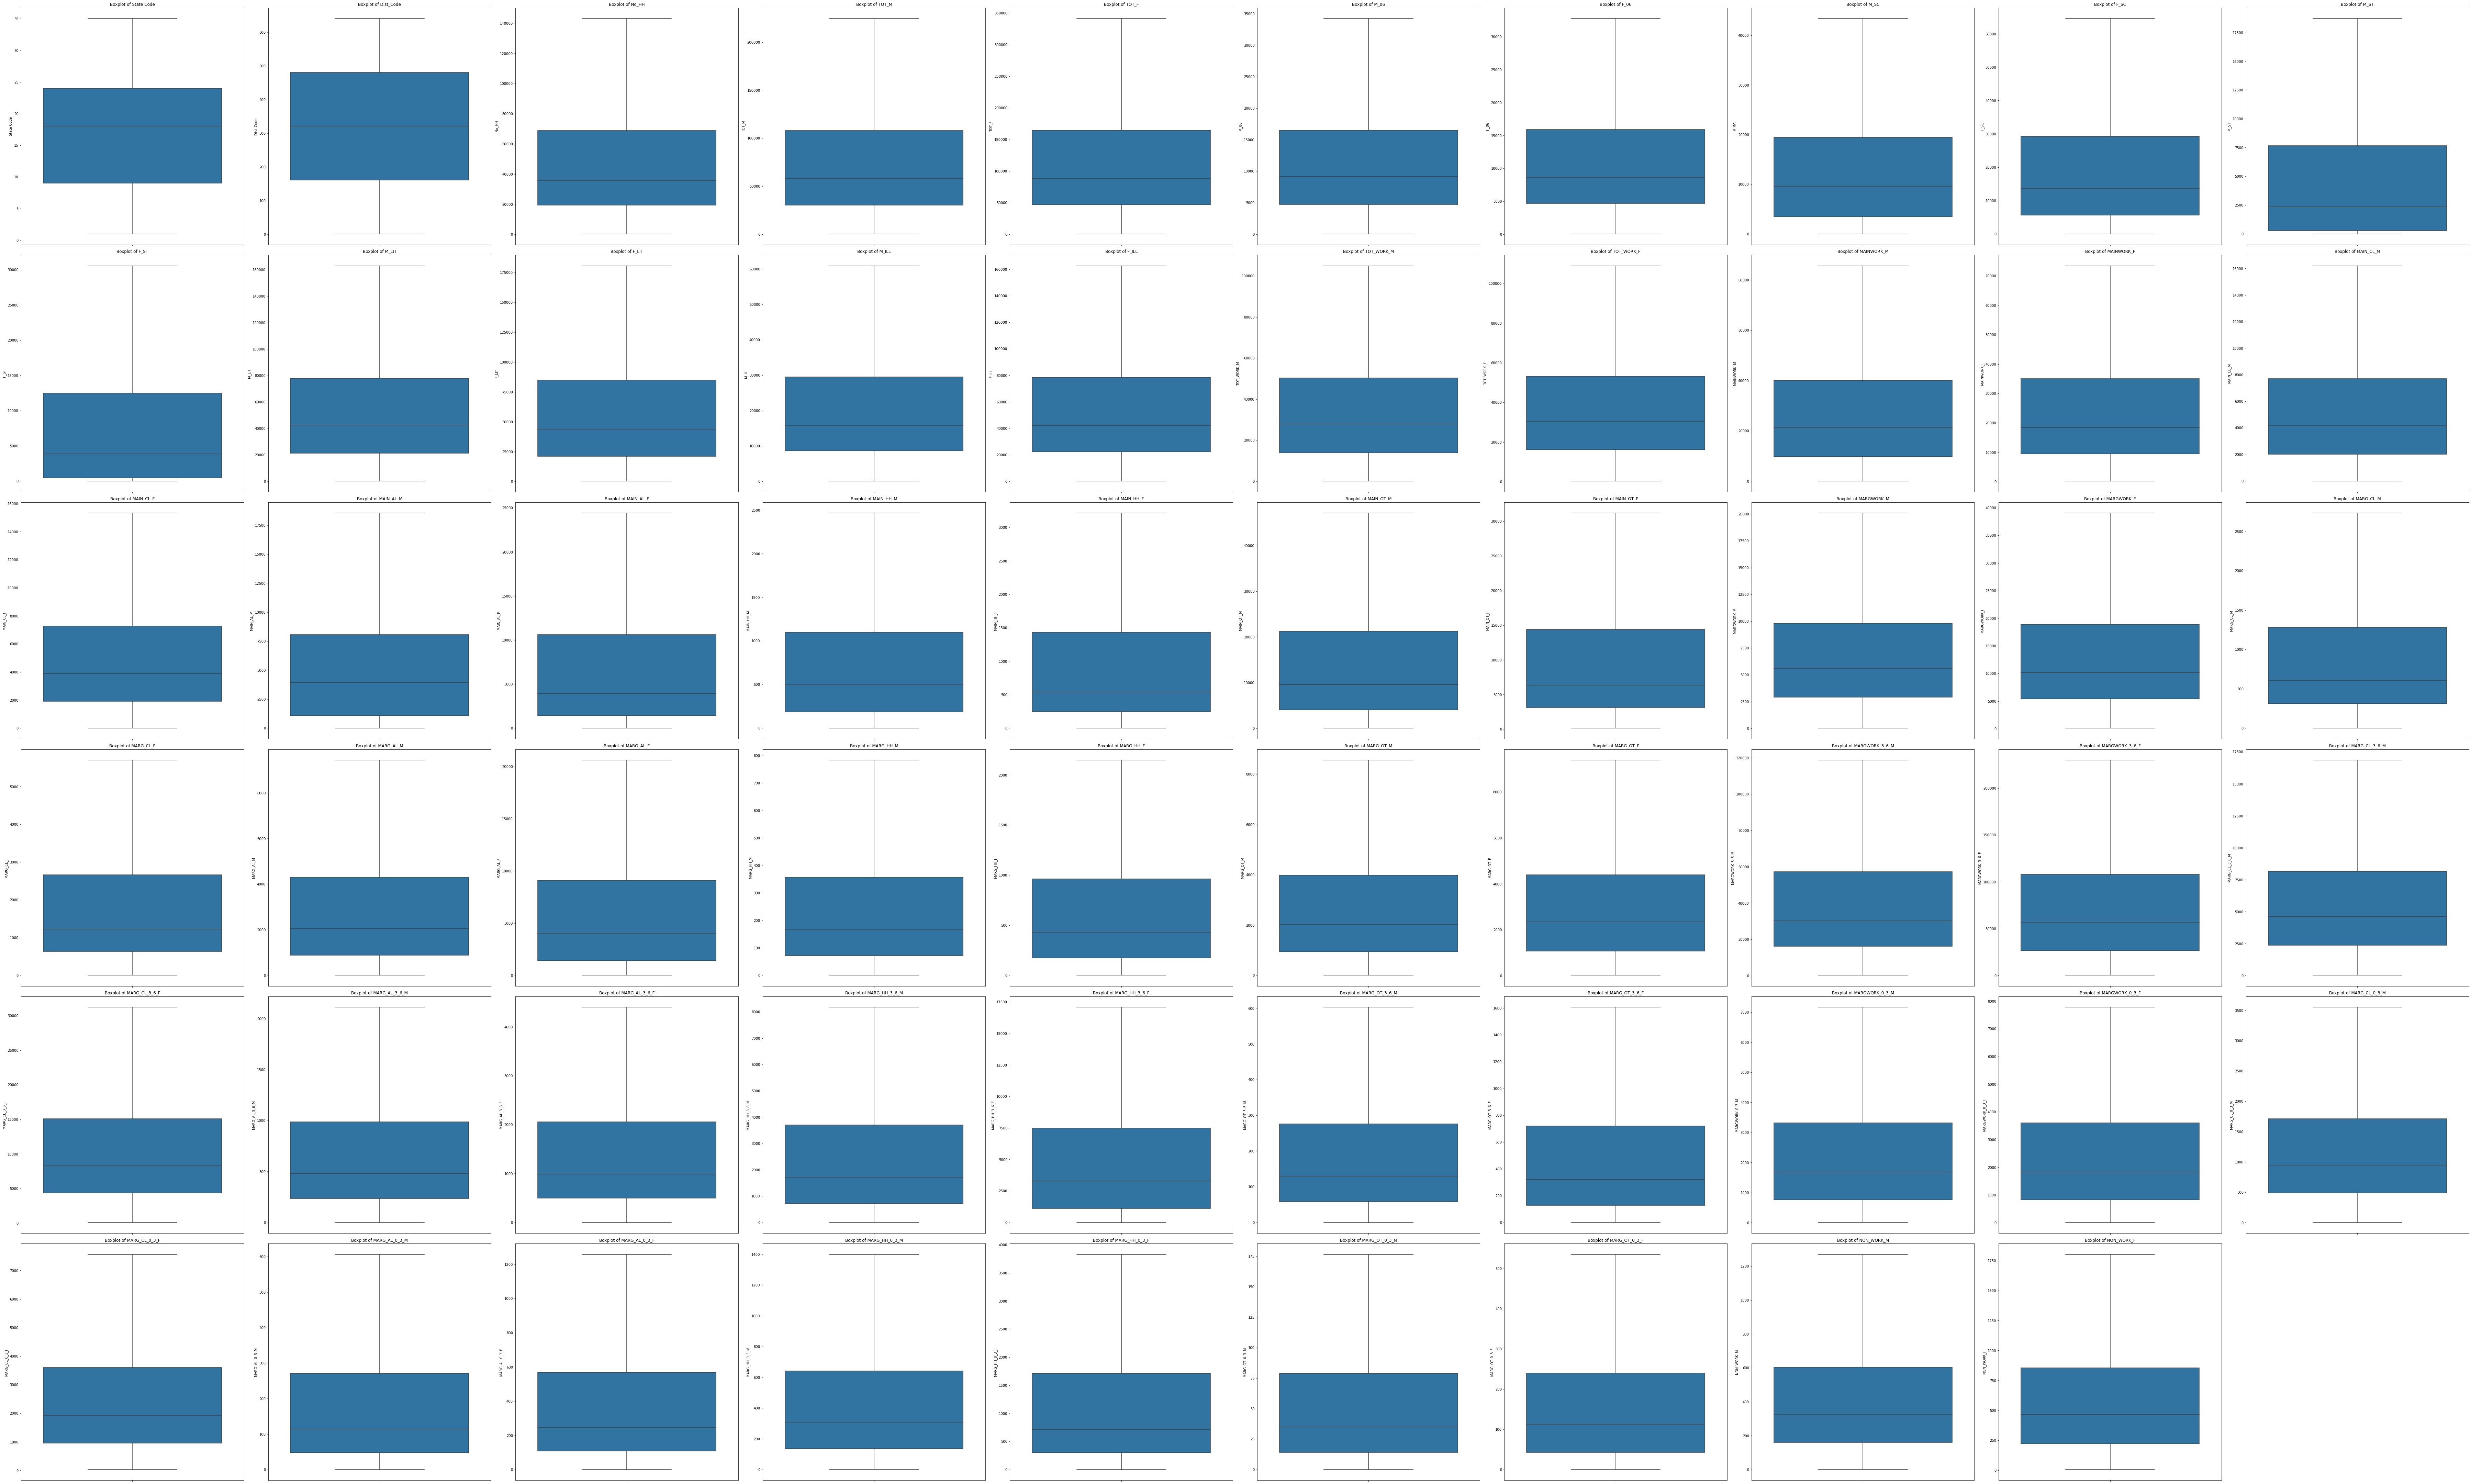

In [206]:
plt.figure(figsize = (100,100))
feature_list = df2.columns
for i in range(len(feature_list)):
    plt.subplot(10, 10, i + 1)
    sns.boxplot(y = df2[feature_list[i]], data = df2)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Part 2 - PCA: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

In [207]:
df2.describe()

State Code   Dist_Code          No_HH          TOT_M          TOT_F  \
count  640.000000  640.000000     640.000000     640.000000     640.000000   
mean    17.114062  320.500000   48515.542188   76041.601953  116079.808594   
std      9.426486  184.896367   39308.008223   60233.862106   92154.544396   
min      1.000000    1.000000     350.000000     391.000000     698.000000   
25%      9.000000  160.750000   19484.000000   30228.000000   46517.750000   
50%     18.000000  320.500000   35837.000000   58339.000000   87724.500000   
75%     24.000000  480.250000   68892.000000  107918.500000  164251.750000   
max     35.000000  640.000000  143004.000000  224454.250000  340852.750000   

               M_06          F_06          M_SC          F_SC          M_ST  \
count    640.000000    640.000000    640.000000    640.000000    640.000000   
mean   11638.096875  11234.508203  13173.196875  19764.365039   5068.761133   
std     9253.649941   8983.799265  12201.892925  18315.276108   6018.652465   
min       56.000000     56.000000      0.000000      0.000000      0.000000   
25%     4733.750000   4672.250000   3466.250000   5603.250000    293.750000   
50%     9159.000000   8663.000000   9591.500000  13709.000000   2333.500000   
75%    16520.250000  15902.250000  19429.750000  29180.000000   7658.000000   
max    34200.000000  32747.250000  43375.000000  64545.125000  18704.375000   

       ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
count  ...     640.000000     640.000000     640.000000     640.000000   
mean   ...    1243.500000    2554.161719     187.805664     402.933008   
std    ...     999.851461    2098.515606     186.884611     392.233200   
min    ...       4.000000      30.000000       0.000000       0.000000   
25%    ...     489.500000     957.250000      47.000000     109.000000   
50%    ...     949.000000    1928.000000     114.500000     247.500000   
75%    ...    1714.000000    3599.750000     270.750000     568.750000   
max    ...    3550.750000    7563.500000     606.375000    1258.375000   

       MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
count     640.000000     640.000000     640.000000     640.000000   
mean      456.679297    1157.905078      56.320312     164.198438   
std       426.951049    1142.279691      54.894326     156.264559   
min         0.000000       0.000000       0.000000       0.000000   
25%       136.500000     298.000000      14.000000      43.000000   
50%       308.000000     717.000000      35.000000     113.000000   
75%       642.000000    1710.750000      79.000000     240.000000   
max      1400.250000    3829.875000     176.500000     535.500000   

        NON_WORK_M   NON_WORK_F  
count   640.000000   640.000000  
mean    443.924219   609.501562  
std     374.014651   510.812596  
min       0.000000     5.000000  
25%     161.000000   220.500000  
50%     326.000000   464.500000  
75%     604.500000   853.500000  
max    1269.750000  1803.000000  

[8 rows x 59 columns]

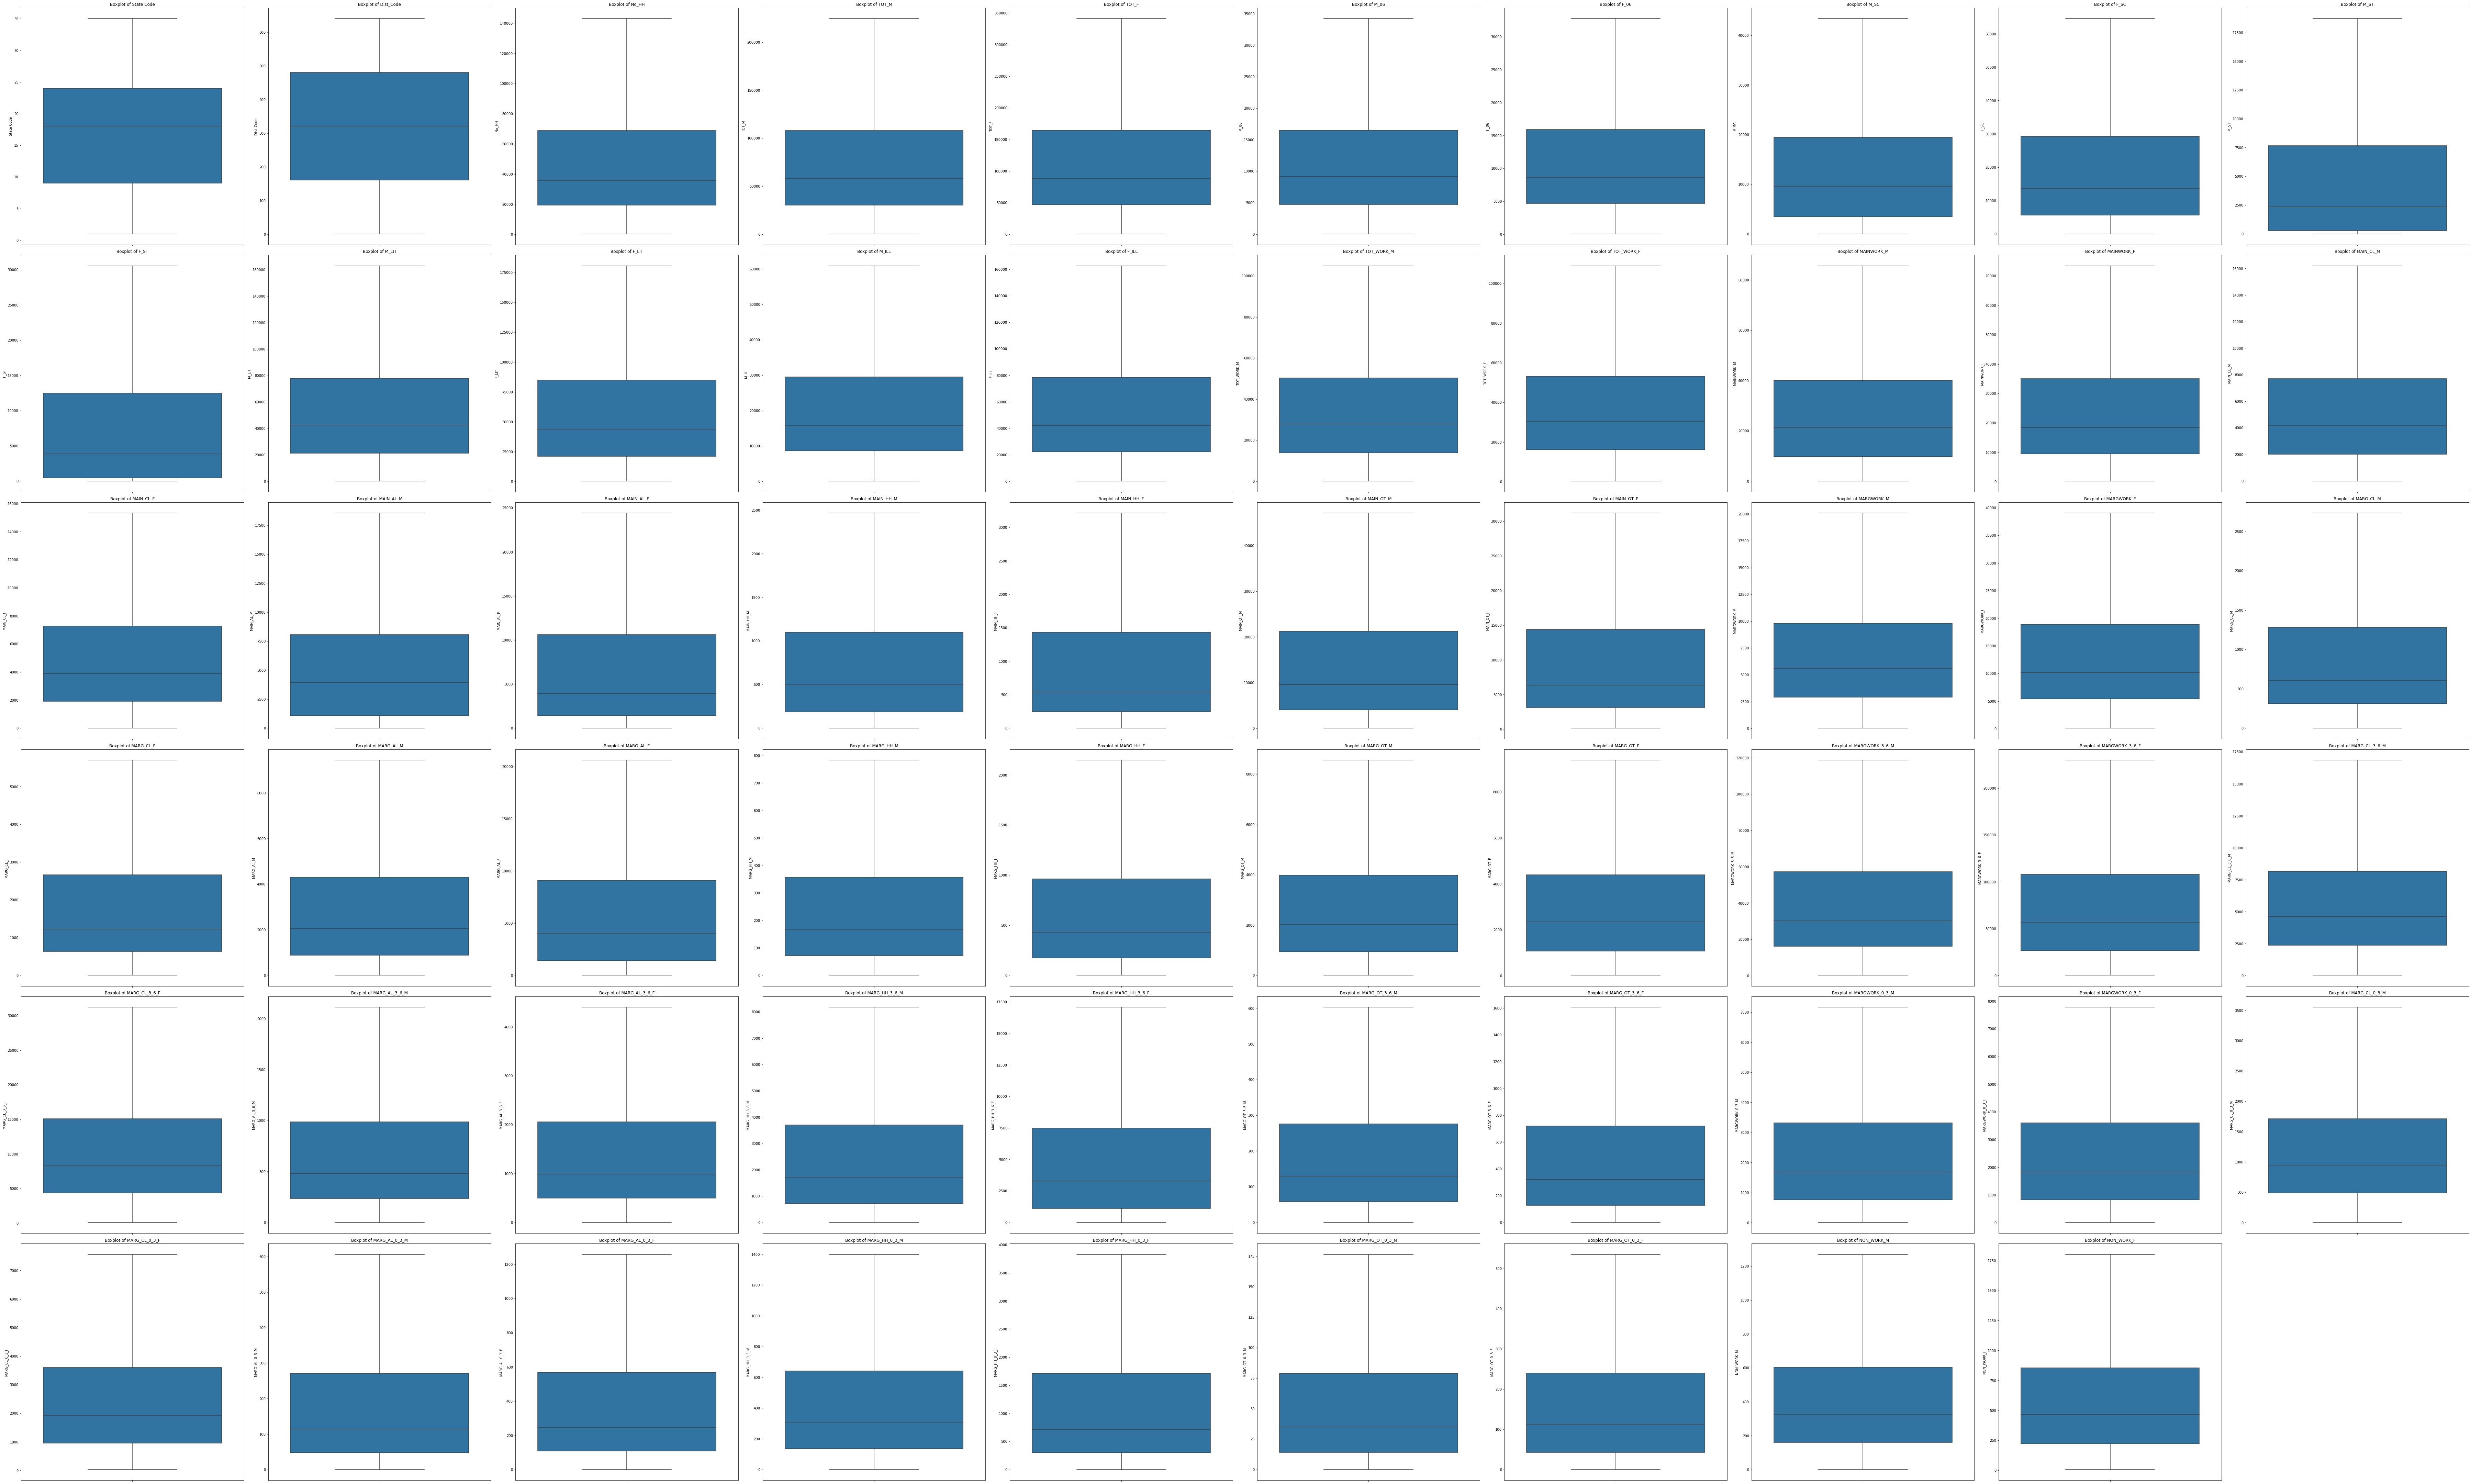

In [208]:
plt.figure(figsize = (100,100))
feature_list = df2.columns
for i in range(len(feature_list)):
    plt.subplot(10, 10, i + 1)
    sns.boxplot(y = df2[feature_list[i]], data = df2)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [209]:
df_scaled1 = df2.apply(zscore)
df_scaled1.head()

State Code  Dist_Code     No_HH     TOT_M     TOT_F      M_06      F_06  \
0   -1.710782  -1.729347 -1.038986 -0.874837 -0.937027 -0.624685 -0.561282   
1   -1.710782  -1.723934 -1.076896 -0.938023 -1.009723 -0.773932 -0.835657   
2   -1.710782  -1.718521 -1.121858 -1.154665 -1.141539 -1.141642 -1.138104   
3   -1.710782  -1.713109 -1.201599 -1.217171 -1.214930 -1.197772 -1.176091   
4   -1.710782  -1.707696 -0.938495 -0.921309 -0.935018 -0.700931 -0.740523   

       M_SC      F_SC      M_ST  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -1.080201 -1.079963 -0.510440  ...      -0.093587      -0.860882   
1 -1.079873 -1.079635 -0.771833  ...      -0.719169      -0.877096   
2 -1.080201 -1.079635  0.122588  ...      -1.130551      -1.128423   
3 -1.080447 -1.079963 -0.399531  ...      -1.050477      -1.100286   
4 -1.078807 -1.078160  0.432534  ...      -0.369844      -0.298617   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.041800      -0.423378       0.523468      -0.793688      -0.443385   
1      -0.347040      -0.443790      -0.634478      -0.884805       0.358782   
2      -0.770091      -0.800999      -1.063434      -0.984684      -1.026779   
3      -0.679055      -0.701491      -1.039994      -0.970666      -0.953855   
4       1.484398       1.633130      -0.589942      -0.749882      -0.589234   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.756991   -0.497493   -0.774865  
1       0.088391   -0.813235   -0.880662  
2      -1.025976   -1.008568   -1.074622  
3      -0.987550   -0.877454   -1.078541  
4      -0.379131   -0.706204   -0.257637  

[5 rows x 59 columns]

In [210]:
df_scaled1.describe()

State Code     Dist_Code         No_HH         TOT_M         TOT_F  \
count  6.400000e+02  6.400000e+02  6.400000e+02  6.400000e+02  6.400000e+02   
mean  -1.121325e-15 -5.169476e-17 -1.516148e-16  1.457168e-17  8.881784e-17   
std    1.000782e+00  1.000782e+00  1.000782e+00  1.000782e+00  1.000782e+00   
min   -1.710782e+00 -1.729347e+00 -1.226295e+00 -1.256930e+00 -1.253026e+00   
25%   -8.614460e-01 -8.646733e-01 -7.391433e-01 -7.611904e-01 -7.554317e-01   
50%    9.405736e-02  0.000000e+00 -3.227958e-01 -2.941277e-01 -3.079337e-01   
75%    7.310596e-01  8.646733e-01  5.187848e-01  5.296328e-01  5.231388e-01   
max    1.898897e+00  1.729347e+00  2.405677e+00  2.465868e+00  2.440995e+00   

               M_06          F_06          M_SC          F_SC          M_ST  \
count  6.400000e+02  6.400000e+02  6.400000e+02  6.400000e+02  6.400000e+02   
mean   3.295975e-17 -6.626644e-17 -5.342948e-17  8.673617e-17 -9.037909e-17   
std    1.000782e+00  1.000782e+00  1.000782e+00  1.000782e+00  1.000782e+00   
min   -1.252604e+00 -1.245270e+00 -1.080447e+00 -1.079963e+00 -8.428341e-01   
25%   -7.467051e-01 -7.310260e-01 -7.961502e-01 -7.737908e-01 -7.939894e-01   
50%   -2.681143e-01 -2.864623e-01 -2.937658e-01 -3.308769e-01 -4.548195e-01   
75%    5.280048e-01  5.199796e-01  5.131537e-01  5.144885e-01  4.305389e-01   
max    2.440070e+00  2.396488e+00  2.477110e+00  2.446907e+00  2.267331e+00   

       ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
count  ...   6.400000e+02   6.400000e+02   6.400000e+02   6.400000e+02   
mean   ...   1.280226e-16  -2.393918e-17   2.411266e-17  -3.396589e-16   
std    ...   1.000782e+00   1.000782e+00   1.000782e+00   1.000782e+00   
min    ...  -1.240654e+00  -1.203773e+00  -1.005714e+00  -1.028083e+00   
25%    ...  -7.547019e-01  -7.615673e-01  -7.540257e-01  -7.499694e-01   
50%    ...  -2.947741e-01  -2.986165e-01  -3.925577e-01  -3.965870e-01   
75%    ...   4.709380e-01   4.986411e-01   4.441736e-01   4.230817e-01   
max    ...   2.309398e+00   2.388954e+00   2.241473e+00   2.182658e+00   

       MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
count   6.400000e+02   6.400000e+02   6.400000e+02   6.400000e+02   
mean    3.747003e-17  -7.598089e-17   5.030698e-18  -2.005340e-16   
std     1.000782e+00   1.000782e+00   1.000782e+00   1.000782e+00   
min    -1.070466e+00  -1.014472e+00  -1.026779e+00  -1.051594e+00   
25%    -7.505070e-01  -7.533861e-01  -7.715445e-01  -7.762044e-01   
50%    -3.485074e-01  -3.862889e-01  -3.886921e-01  -3.278957e-01   
75%     4.343956e-01   4.843624e-01   4.134749e-01   4.854642e-01   
max     2.211749e+00   2.340985e+00   2.191004e+00   2.377967e+00   

         NON_WORK_M    NON_WORK_F  
count  6.400000e+02  6.400000e+02  
mean   2.949030e-18 -3.191891e-17  
std    1.000782e+00  1.000782e+00  
min   -1.187845e+00 -1.184337e+00  
25%   -7.570439e-01 -7.621304e-01  
50%   -3.155397e-01 -2.840865e-01  
75%    4.296660e-01  4.780408e-01  
max    2.209731e+00  2.338298e+00  

[8 rows x 59 columns]

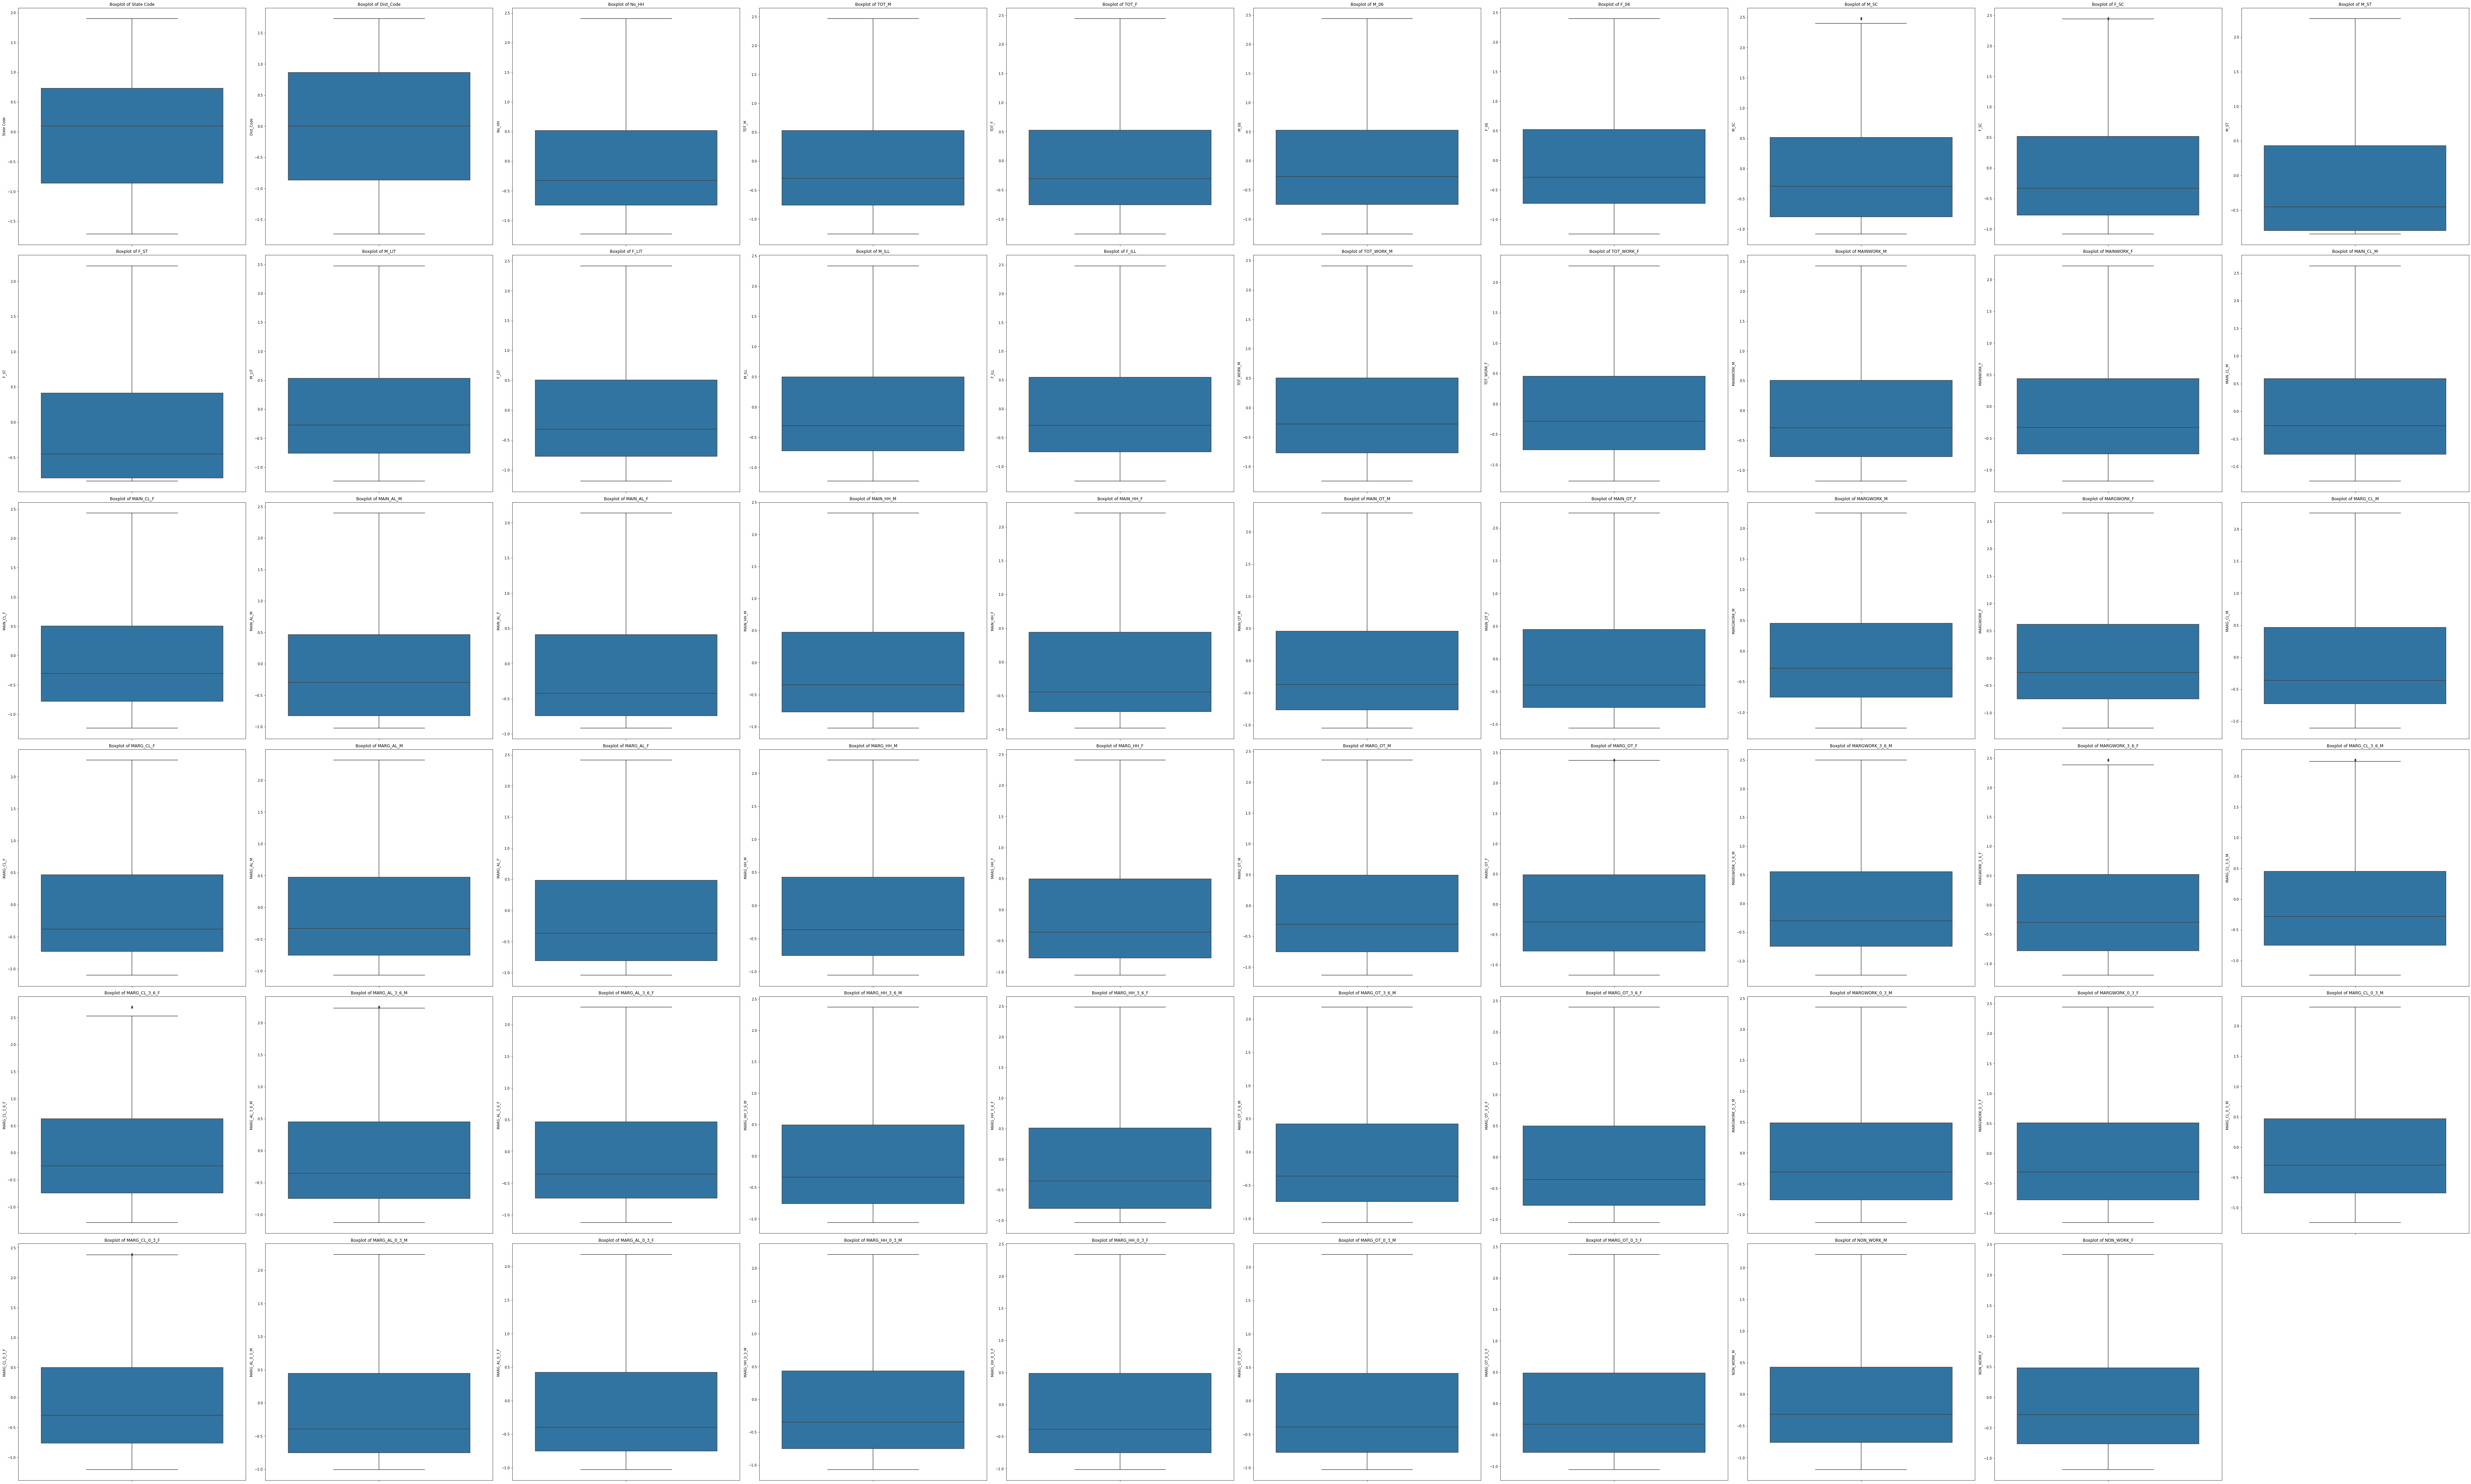

In [211]:
plt.figure(figsize = (100,100))
feature_list = df_scaled1.columns
for i in range(len(feature_list)):
    plt.subplot(10, 10, i + 1)
    sns.boxplot(y = df_scaled1[feature_list[i]], data = df_scaled1)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Ans : Though the values of the dataset changes before scaling and after scaling but scaling does not have any impact on the outliers. 

Part 2 - PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

In [212]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10, random_state=123)
pca_transformed = pca.fit_transform(df_scaled1)

In [213]:
cov_matrix = np.cov(df_scaled1.T)
cov_matrix

array([[1.00156495, 0.99457535, 0.40338248, ..., 0.05909443, 0.12308779,
        0.2447105 ],
       [0.99457535, 1.00156495, 0.39634859, ..., 0.06808479, 0.11066561,
        0.22599926],
       [0.40338248, 0.39634859, 1.00156495, ..., 0.65276151, 0.76840117,
        0.79788409],
       ...,
       [0.05909443, 0.06808479, 0.65276151, ..., 1.00156495, 0.76249106,
        0.72075284],
       [0.12308779, 0.11066561, 0.76840117, ..., 0.76249106, 1.00156495,
        0.90224595],
       [0.2447105 , 0.22599926, 0.79788409, ..., 0.72075284, 0.90224595,
        1.00156495]])

In [214]:
#eigen vectors
pca.components_

array([[ 3.03688860e-02,  3.03440259e-02,  1.49578258e-01,
         1.59042954e-01,  1.58309967e-01,  1.55991131e-01,
         1.56487962e-01,  1.43090989e-01,  1.43476574e-01,
         1.93807873e-02,  1.84416462e-02,  1.55136723e-01,
         1.45628500e-01,  1.54169234e-01,  1.58234026e-01,
         1.54144405e-01,  1.43017519e-01,  1.42128725e-01,
         1.26412729e-01,  1.11367253e-01,  8.30861699e-02,
         1.19622541e-01,  9.09501914e-02,  1.41586046e-01,
         1.34077902e-01,  1.22996830e-01,  1.17394626e-01,
         1.56268593e-01,  1.48601672e-01,  8.73132497e-02,
         6.44195801e-02,  1.26949621e-01,  1.16038294e-01,
         1.44893506e-01,  1.42057716e-01,  1.50709731e-01,
         1.48056619e-01,  1.57625556e-01,  1.55717155e-01,
         1.57298763e-01,  1.49488236e-01,  9.39879280e-02,
         6.64809183e-02,  1.27883007e-01,  1.14184121e-01,
         1.44646678e-01,  1.40809965e-01,  1.50762632e-01,
         1.47581457e-01,  1.42392766e-01,  1.33439705e-0

In [215]:
#eigen values
pca.explained_variance_

array([35.71084748,  7.98557733,  4.50785903,  2.77867519,  1.9747286 ,
        1.17776767,  1.13039501,  0.72210337,  0.46443165,  0.34677311])

In [216]:
tot = sum(pca.explained_variance_)
var_exp = [( i /tot ) * 100 for i in sorted(pca.explained_variance_, reverse=True)]
print('The variance explained by each of eigen values in order is ',var_exp)

The variance explained by each of eigen values in order is  [62.87214188074222, 14.059323318364573, 7.936489126846456, 4.892106262352121, 3.476686369838436, 2.073565347937926, 1.9901615408856093, 1.2713275933823205, 0.8176734786498712, 0.6105250810004811]


In [217]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 62.87214188  76.9314652   84.86795433  89.76006059  93.23674696
  95.31031231  97.30047385  98.57180144  99.38947492 100.        ]


In [218]:
pca.explained_variance_ratio_

array([0.60432287, 0.13513729, 0.07628501, 0.0470226 , 0.03341768,
       0.01993097, 0.0191293 , 0.01221992, 0.00785942, 0.00586833])

Part 2 - PCA: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

In [219]:
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10'],
                                    index = df_scaled1.columns)

In [220]:
df_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
State Code      0.030369 -0.172197  0.301347  0.000705  0.150191  0.247414   
Dist_Code       0.030344 -0.169017  0.306418 -0.021726  0.134957  0.244014   
No_HH           0.149578 -0.119692  0.068243  0.079420 -0.027566 -0.030231   
TOT_M           0.159043 -0.070203 -0.059847  0.053010 -0.046639 -0.109570   
TOT_F           0.158310 -0.090756  0.002988  0.071231 -0.032287 -0.073524   
M_06            0.155991 -0.008429 -0.083250  0.027788 -0.077506 -0.139006   
F_06            0.156488 -0.003740 -0.074635  0.015675 -0.074457 -0.125977   
M_SC            0.143091 -0.065874 -0.072860  0.011447 -0.176436 -0.079702   
F_SC            0.143477 -0.079867 -0.016494  0.018471 -0.169565 -0.041946   
M_ST            0.019381  0.037398  0.306361  0.096905  0.331960 -0.134892   
F_ST            0.018442  0.034439  0.319022  0.085685  0.327077 -0.140749   
M_LIT           0.155137 -0.096793 -0.055020  0.089137 -0.017307 -0.091842   
F_LIT           0.145628 -0.127600 -0.029119  0.125514  0.026079 -0.071206   
M_ILL           0.154169  0.001441 -0.062727 -0.034341 -0.111431 -0.134860   
F_ILL           0.158234 -0.022848  0.051282 -0.007664 -0.129124 -0.046765   
TOT_WORK_M      0.154144 -0.113606 -0.031537  0.069886 -0.033220 -0.074548   
TOT_WORK_F      0.143018 -0.090170  0.159079  0.115446 -0.042729  0.062782   
MAINWORK_M      0.142129 -0.159209 -0.023820  0.101835 -0.058857 -0.069856   
MAINWORK_F      0.126413 -0.155842  0.160575  0.138102 -0.080746  0.083709   
MAIN_CL_M       0.111367  0.045694  0.010795  0.081520 -0.306660  0.122516   
MAIN_CL_F       0.083086  0.079441  0.171775  0.269795 -0.263532  0.240712   
MAIN_AL_M       0.119623 -0.065751  0.171434 -0.114340 -0.291552 -0.045482   
MAIN_AL_F       0.090950 -0.101185  0.301287 -0.012233 -0.238836  0.088973   
MAIN_HH_M       0.141586 -0.084057 -0.124719 -0.022876 -0.059709  0.060041   
MAIN_HH_F       0.134078 -0.110852 -0.000178 -0.044631 -0.021624  0.321938   
MAIN_OT_M       0.122997 -0.192289 -0.066982  0.147087  0.058316 -0.087618   
MAIN_OT_F       0.117395 -0.205368  0.026629  0.157600  0.086726 -0.024858   
MARGWORK_M      0.156269  0.082534 -0.042072 -0.080774  0.077737 -0.062608   
MARGWORK_F      0.148602  0.096149  0.116855  0.017220  0.066738 -0.030490   
MARG_CL_M       0.087313  0.272350 -0.043324  0.153502  0.018017  0.076850   
MARG_CL_F       0.064420  0.271108  0.013206  0.283131 -0.027852  0.089071   
MARG_AL_M       0.126950  0.147508  0.086998 -0.248980 -0.058694 -0.101722   
MARG_AL_F       0.116038  0.109053  0.253974 -0.148233 -0.050821 -0.093573   
MARG_HH_M       0.144894  0.052744 -0.117574 -0.171015  0.031157  0.138819   
MARG_HH_F       0.142058  0.013620 -0.073269 -0.154159  0.067467  0.332427   
MARG_OT_M       0.150710 -0.060215 -0.122757  0.017705  0.159437 -0.014788   
MARG_OT_F       0.148057 -0.081908 -0.054826  0.057996  0.192706  0.020633   
MARGWORK_3_6_M  0.157626 -0.032138 -0.080215  0.038743 -0.059470 -0.135898   
MARGWORK_3_6_F  0.155717 -0.080931 -0.077205  0.045570 -0.023061 -0.127262   
MARG_CL_3_6_M   0.157299  0.069344 -0.036820 -0.093248  0.069387 -0.060997   
MARG_CL_3_6_F   0.149488  0.075918  0.131155  0.020900  0.049892 -0.015868   
MARG_AL_3_6_M   0.093988  0.261252 -0.036173  0.128132  0.021351  0.082432   
MARG_AL_3_6_F   0.066481  0.260913  0.028120  0.291364 -0.035601  0.101310   
MARG_HH_3_6_M   0.127883  0.140403  0.092167 -0.248474 -0.071079 -0.097106   
MARG_HH_3_6_F   0.114184  0.093242  0.271141 -0.136845 -0.067241 -0.080601   
MARG_OT_3_6_M   0.144647  0.048552 -0.116912 -0.169402  0.028453  0.141586   
MARG_OT_3_6_F   0.140810  0.003398 -0.071981 -0.145102  0.063828  0.344160   
MARGWORK_0_3_M  0.150763 -0.064324 -0.123414  0.016487  0.147414 -0.011522   
MARGWORK_0_3_F  0.147581 -0.093580 -0.062493  0.058185  0.172976  0.020482   
MARG_CL_0_3_M   0.142393  0.141883 -0.063649 -0.021494  0.111892 -0.077048   
MARG_CL_0_3_F   0.133440  0.157693  0.06586

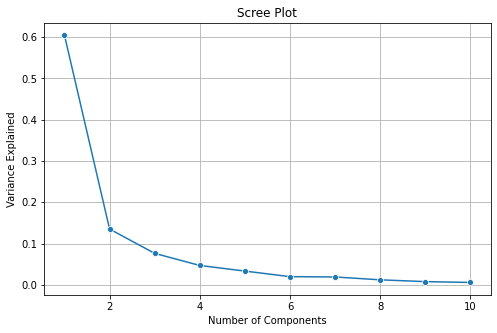

In [221]:
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,11),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [222]:
np.cumsum(pca.explained_variance_ratio_)

array([0.60432287, 0.73946015, 0.81574516, 0.86276777, 0.89618544,
       0.91611642, 0.93524572, 0.94746564, 0.95532506, 0.96119339])

In [223]:
print('From the above plot, we can see that the number of components that we can probably take is 4.\n'
      'We also see that if we take 5 components the total amount of variance explained is',cum_var_exp[4],'%')

From the above plot, we can see that the number of components that we can probably take is 4.
We also see that if we take 5 components the total amount of variance explained is 93.2367469581438 %


In [224]:
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]
df_selected

PC1       PC2       PC3       PC4       PC5
State Code      0.030369 -0.172197  0.301347  0.000705  0.150191
Dist_Code       0.030344 -0.169017  0.306418 -0.021726  0.134957
No_HH           0.149578 -0.119692  0.068243  0.079420 -0.027566
TOT_M           0.159043 -0.070203 -0.059847  0.053010 -0.046639
TOT_F           0.158310 -0.090756  0.002988  0.071231 -0.032287
M_06            0.155991 -0.008429 -0.083250  0.027788 -0.077506
F_06            0.156488 -0.003740 -0.074635  0.015675 -0.074457
M_SC            0.143091 -0.065874 -0.072860  0.011447 -0.176436
F_SC            0.143477 -0.079867 -0.016494  0.018471 -0.169565
M_ST            0.019381  0.037398  0.306361  0.096905  0.331960
F_ST            0.018442  0.034439  0.319022  0.085685  0.327077
M_LIT           0.155137 -0.096793 -0.055020  0.089137 -0.017307
F_LIT           0.145628 -0.127600 -0.029119  0.125514  0.026079
M_ILL           0.154169  0.001441 -0.062727 -0.034341 -0.111431
F_ILL           0.158234 -0.022848  0.051282 -0.007664 -0.129124
TOT_WORK_M      0.154144 -0.113606 -0.031537  0.069886 -0.033220
TOT_WORK_F      0.143018 -0.090170  0.159079  0.115446 -0.042729
MAINWORK_M      0.142129 -0.159209 -0.023820  0.101835 -0.058857
MAINWORK_F      0.126413 -0.155842  0.160575  0.138102 -0.080746
MAIN_CL_M       0.111367  0.045694  0.010795  0.081520 -0.306660
MAIN_CL_F       0.083086  0.079441  0.171775  0.269795 -0.263532
MAIN_AL_M       0.119623 -0.065751  0.171434 -0.114340 -0.291552
MAIN_AL_F       0.090950 -0.101185  0.301287 -0.012233 -0.238836
MAIN_HH_M       0.141586 -0.084057 -0.124719 -0.022876 -0.059709
MAIN_HH_F       0.134078 -0.110852 -0.000178 -0.044631 -0.021624
MAIN_OT_M       0.122997 -0.192289 -0.066982  0.147087  0.058316
MAIN_OT_F       0.117395 -0.205368  0.026629  0.157600  0.086726
MARGWORK_M      0.156269  0.082534 -0.042072 -0.080774  0.077737
MARGWORK_F      0.148602  0.096149  0.116855  0.017220  0.066738
MARG_CL_M       0.087313  0.272350 -0.043324  0.153502  0.018017
MARG_CL_F       0.064420  0.271108  0.013206  0.283131 -0.027852
MARG_AL_M       0.126950  0.147508  0.086998 -0.248980 -0.058694
MARG_AL_F       0.116038  0.109053  0.253974 -0.148233 -0.050821
MARG_HH_M       0.144894  0.052744 -0.117574 -0.171015  0.031157
MARG_HH_F       0.142058  0.013620 -0.073269 -0.154159  0.067467
MARG_OT_M       0.150710 -0.060215 -0.122757  0.017705  0.159437
MARG_OT_F       0.148057 -0.081908 -0.054826  0.057996  0.192706
MARGWORK_3_6_M  0.157626 -0.032138 -0.080215  0.038743 -0.059470
MARGWORK_3_6_F  0.155717 -0.080931 -0.077205  0.045570 -0.023061
MARG_CL_3_6_M   0.157299  0.069344 -0.036820 -0.093248  0.069387
MARG_CL_3_6_F   0.149488  0.075918  0.131155  0.020900  0.049892
MARG_AL_3_6_M   0.093988  0.261252 -0.036173  0.128132  0.021351
MARG_AL_3_6_F   0.066481  0.260913  0.028120  0.291364 -0.035601
MARG_HH_3_6_M   0.127883  0.140403  0.092167 -0.248474 -0.071079
MARG_HH_3_6_F   0.114184  0.093242  0.271141 -0.136845 -0.067241
MARG_OT_3_6_M   0.144647  0.048552 -0.116912 -0.169402  0.028453
MARG_OT_3_6_F   0.140810  0.003398 -0.071981 -0.145102  0.063828
MARGWORK_0_3_M  0.150763 -0.064324 -0.123414  0.016487  0.147414
MARGWORK_0_3_F  0.147581 -0.093580 -0.062493  0.058185  0.172976
MARG_CL_0_3_M   0.142393  0.141883 -0.063649 -0.021494  0.111892
MARG_CL_0_3_F   0.133440  0.157693  0.065860  0.005402  0.113803
MARG_AL_0_3_M   0.062021  0.285051 -0.060232  0.205191  0.016043
MARG_AL_0_3_F   0.055847  0.287935 -0.031841  0.237508 -0.005115
MARG_HH_0_3_M   0.118630  0.176164  0.053648 -0.240100  0.008914
MARG_HH_0_3_F   0.112922  0.157579  0.180037 -0.186374  0.022710
MARG_OT_0_3_M   0.141647  0.064174 -0.114917 -0.171136  0.040111
MARG_OT_0_3_F   0.141068  0.041303 -0.073507 -0.172120  0.075221
NON_WORK_M      0.147434 -0.037538 -0.112205  0.020352  0.204002
NON_WORK_F      0.142143 -0.038683 -0.017943  0.055381  0.251052

Ans : 5 is the optimum number of PCs

Part 2 - PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

In [225]:
plt.figure(figsize = (100,100))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

Ans : PC5 Component is the most variance. So from the above screenshot, we can see in PC5 the value of the progress in each variables is linear in status and in PC2 component initially the variables values shows as high and later it was decreased and in PC3 components we can see rapid decrease in the variables values and in PC4 component we can see variables values decreasing in a significantly manner and in PC5 component we can standard progress in terms of actual variables in the given dataset.  

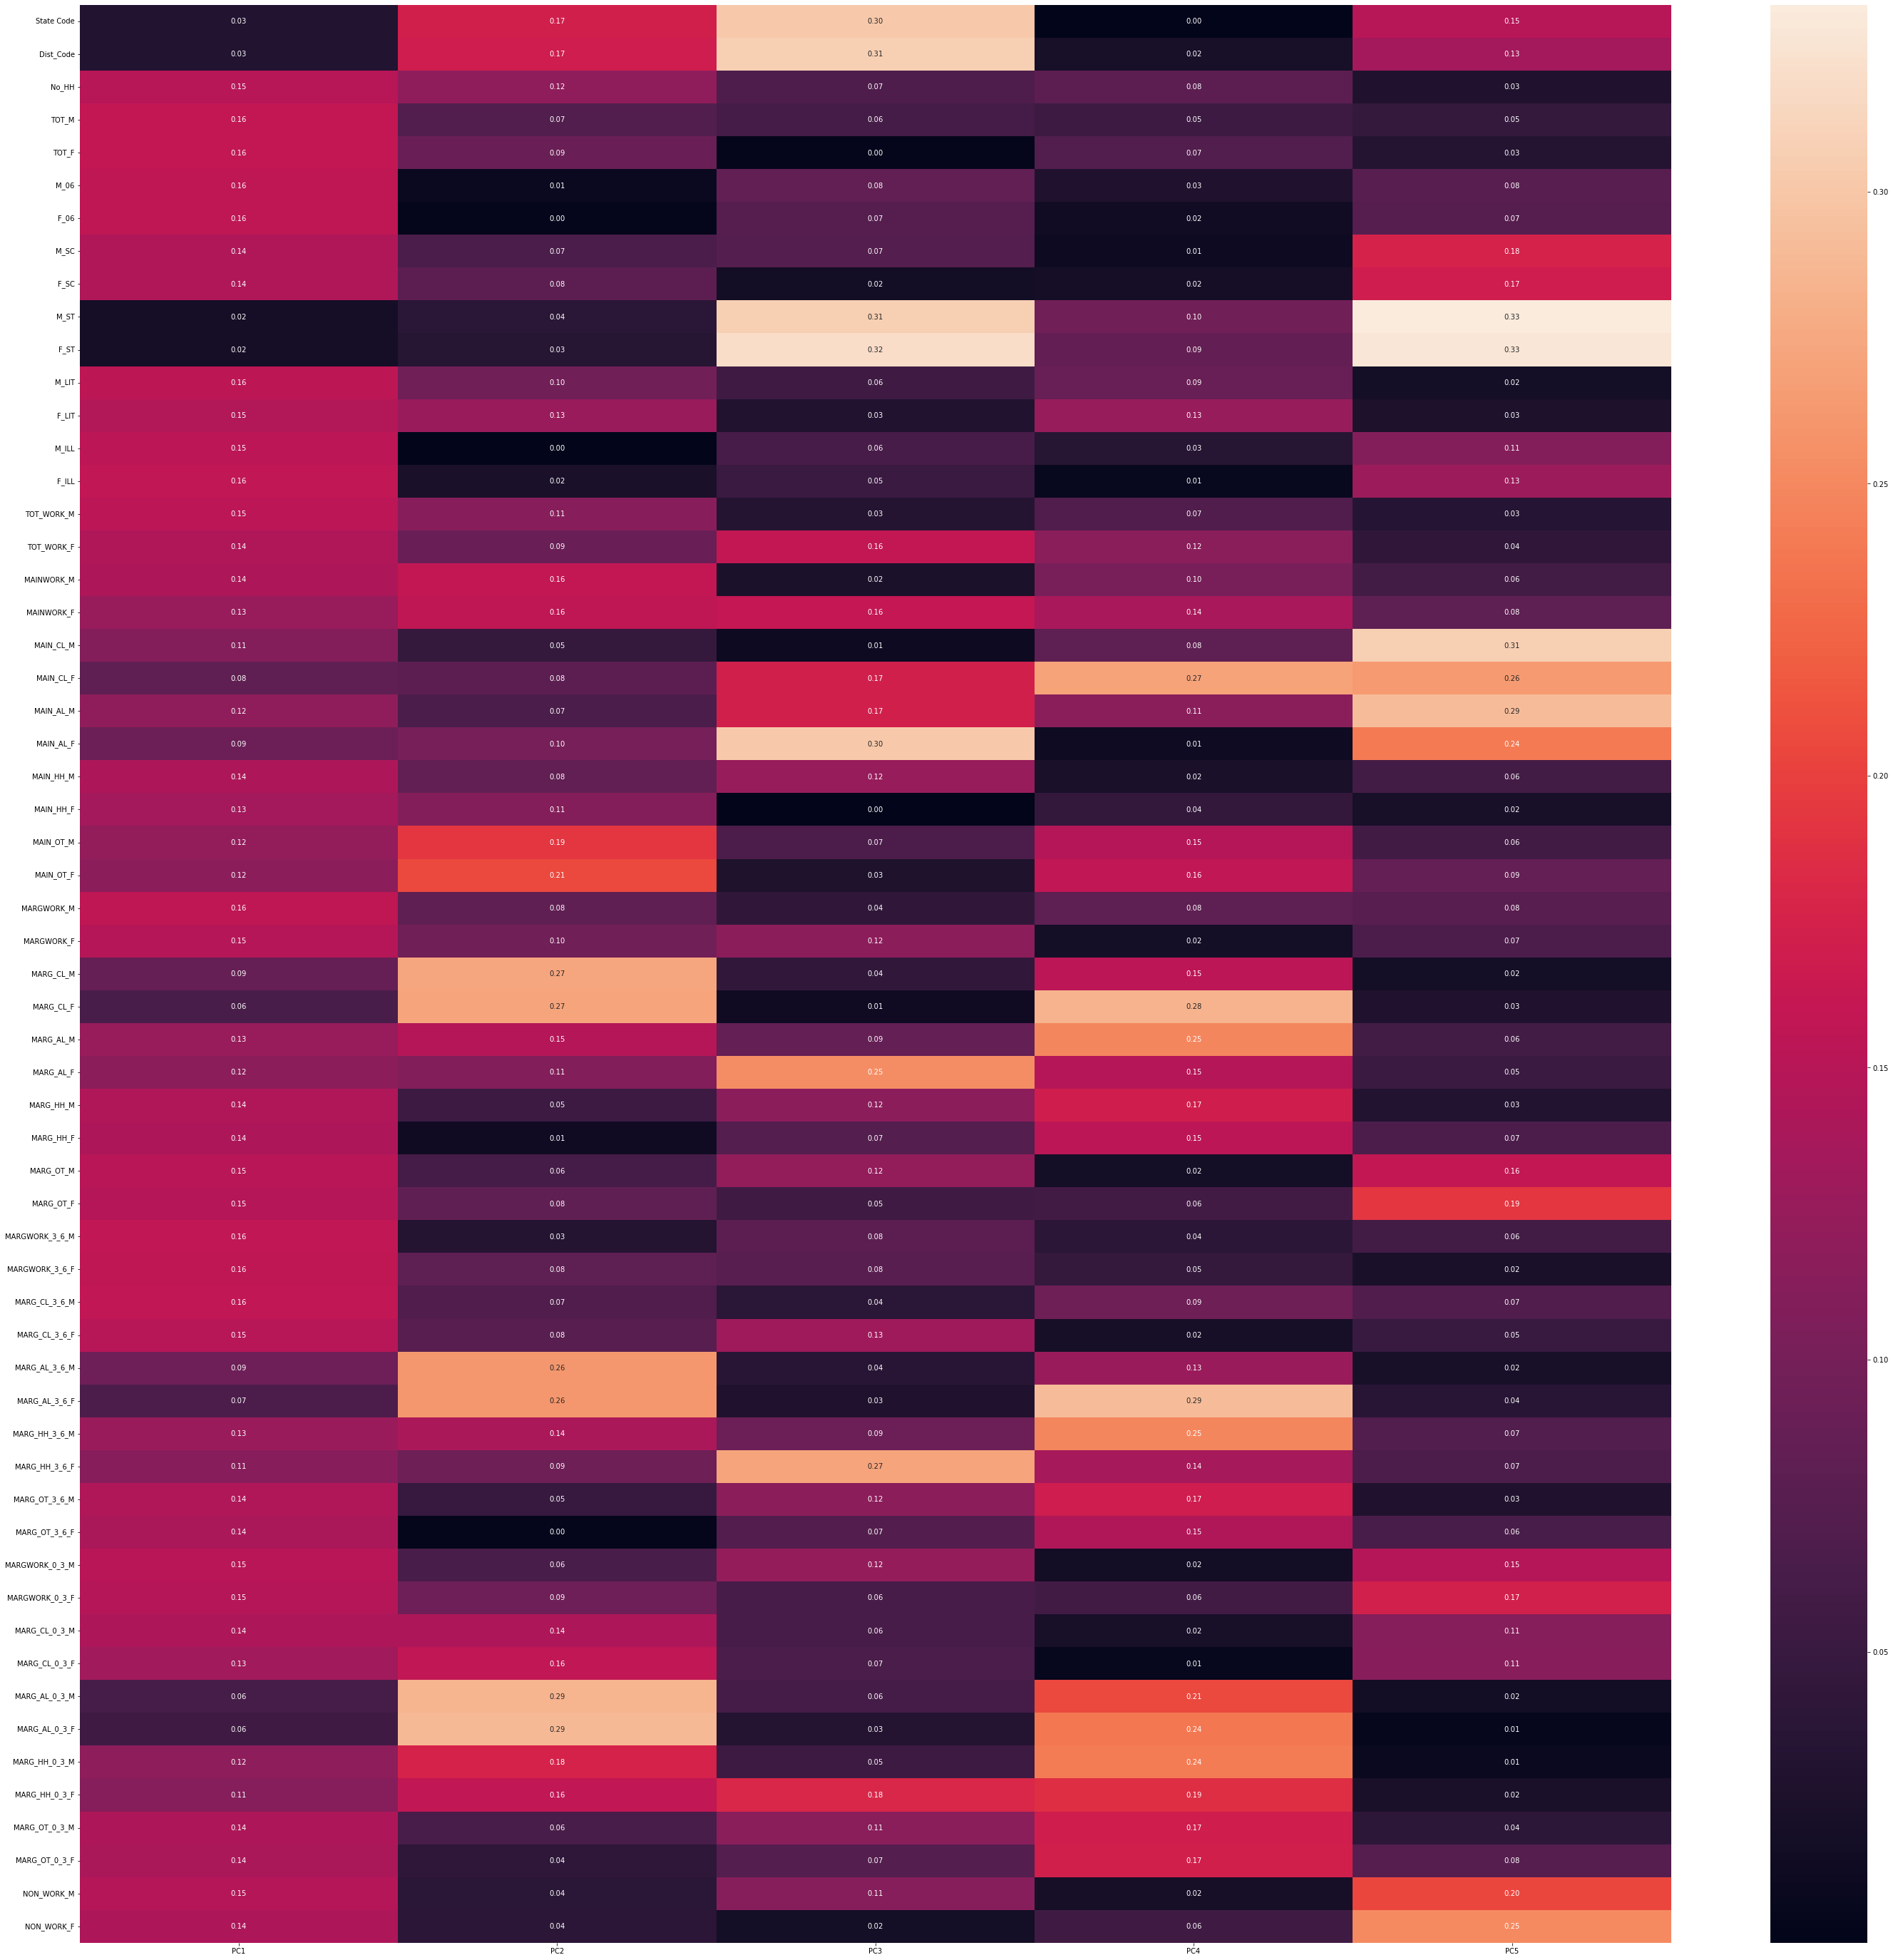

In [226]:
plt.figure(figsize = (50,50))
sns.heatmap(abs(df_selected), annot = True,fmt = '.2f');

From the above heatmap, we can conclude that in PC1 component, has a proper correlation relationship between each variables. In PC1 component, we can see all the types of correlations in a proper segregated manner which has low correlation , medium and low correlation found in each variables with respect to component PCA1. 

Part 2 - PCA: Write linear equation for first PC.

 Ans : PC1 = a1x1 + a2x2 + a3X3 + a4X4 + a5X5 + a6X6 …….+ a59x59